This Project is based on the health data from [Centers for Disease Control & Prevention](https://www.cdc.gov/500cities/)

***Background:***
The 500 Cities project is a collaboration between CDC, the Robert Wood Johnson Foundation, and the CDC Foundation.

There are three types of health-related data that are tracked by the data.

1.  Health Outcomes:
        Arthritis, asthma, high blood pressure, high cholesterol, cancer, diabetes, kidney disease, pulmonary disease stroke, mental health not good for >14 days, physical health not good for >14 days, all teeth lost
2.   Prevention:
         Current lack of health insurance, visits to doctor within past year, visits to dentist, taking medicine for BP, cholesterol screening, mammography, pap smear, fecal occult blood test, up to date on preventative services for men (or women)
3.    Unhealthy Behaviors:
          Binge drinking, smoking, no leisure time physical activity, obesity, sleeping less than 7 hours


In this project, we are trying to predict "**physical health not good for >14 days**" based on available data in Prevention and Unhealthy Behaviors.

In [0]:
import pandas as pd

# https://drive.google.com/open?id=1ufA99nac7B7IV_sjapPI8TnT-36DEq7c
url = "https://drive.google.com/uc?export=download&id=1ufA99nac7B7IV_sjapPI8TnT-36DEq7c"
dataframe = pd.read_csv(url,header=0,error_bad_lines=False) # Extracting the dataset
df_500Cities=pd.DataFrame(dataframe)
df_500Cities.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,ARTHRITIS_AdjPrev,ARTHRITIS_Adj95CI,BINGE_CrudePrev,BINGE_Crude95CI,BINGE_AdjPrev,BINGE_Adj95CI,BPHIGH_CrudePrev,BPHIGH_Crude95CI,BPHIGH_AdjPrev,BPHIGH_Adj95CI,BPMED_CrudePrev,BPMED_Crude95CI,BPMED_AdjPrev,BPMED_Adj95CI,CANCER_CrudePrev,CANCER_Crude95CI,CANCER_AdjPrev,CANCER_Adj95CI,CASTHMA_CrudePrev,CASTHMA_Crude95CI,CASTHMA_AdjPrev,CASTHMA_Adj95CI,CHD_CrudePrev,CHD_Crude95CI,CHD_AdjPrev,CHD_Adj95CI,CHECKUP_CrudePrev,CHECKUP_Crude95CI,CHECKUP_AdjPrev,CHECKUP_Adj95CI,...,KIDNEY_Crude95CI,KIDNEY_AdjPrev,KIDNEY_Adj95CI,LPA_CrudePrev,LPA_Crude95CI,LPA_AdjPrev,LPA_Adj95CI,MAMMOUSE_CrudePrev,MAMMOUSE_Crude95CI,MAMMOUSE_AdjPrev,MAMMOUSE_Adj95CI,MHLTH_CrudePrev,MHLTH_Crude95CI,MHLTH_AdjPrev,MHLTH_Adj95CI,OBESITY_CrudePrev,OBESITY_Crude95CI,OBESITY_AdjPrev,OBESITY_Adj95CI,PAPTEST_CrudePrev,PAPTEST_Crude95CI,PAPTEST_AdjPrev,PAPTEST_Adj95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,PHLTH_AdjPrev,PHLTH_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,TEETHLOST_AdjPrev,TEETHLOST_Adj95CI,Geolocation
0,CA,Folsom,624638,72203,7.5,"( 7.0, 8.0)",7.7,"( 7.2, 8.2)",16.9,"(16.6, 17.2)",17.4,"(17.2, 17.7)",21.8,"(21.5, 22.0)",21.5,"(21.2, 21.7)",25.7,"(25.3, 26.0)",26.3,"(25.9, 26.6)",64.8,"(64.3, 65.2)",49.8,"(49.5, 50.2)",5.8,"( 5.7, 5.8)",6.2,"( 6.1, 6.3)",8.6,"( 8.4, 8.7)",8.5,"( 8.4, 8.7)",4.1,"( 4.0, 4.2)",4.4,"( 4.3, 4.6)",64.7,"(64.4, 65.0)",65.3,"(65.1, 65.6)",...,"( 2.1, 2.1)",2.2,"( 2.1, 2.2)",14.3,"(13.8, 14.8)",14.4,"(13.8, 14.9)",80.4,"(79.6, 81.2)",78.8,"(77.9, 79.7)",9.9,"( 9.6, 10.2)",9.7,"( 9.4, 9.9)",23.8,"(23.5, 24.1)",23.1,"(22.7, 23.4)",84.3,"(83.7, 84.9)",82.9,"(82.3, 83.5)",8.9,"( 8.6, 9.2)",8.8,"( 8.5, 9.1)",33.9,"(33.5, 34.3)",33.1,"(32.7, 33.5)",1.9,"( 1.9, 2.0)",2.0,"( 2.0, 2.1)",6.8,"( 5.7, 8.0)",6.8,"( 5.7, 7.9)","(38.67504943280, -121.147605753)"
1,FL,Largo,1239425,77648,19.6,"(19.1, 20.2)",20.9,"(20.4, 21.5)",30.6,"(30.3, 30.9)",23.3,"(23.1, 23.5)",16.9,"(16.8, 17.0)",20.6,"(20.5, 20.8)",36.1,"(35.8, 36.4)",28.4,"(28.2, 28.7)",81.0,"(80.9, 81.2)",58.4,"(58.2, 58.6)",9.0,"( 8.9, 9.1)",6.3,"( 6.3, 6.4)",7.9,"( 7.8, 8.0)",8.1,"( 8.0, 8.2)",9.8,"( 9.6, 10.0)",6.7,"( 6.5, 6.8)",77.5,"(77.4, 77.6)",73.6,"(73.4, 73.8)",...,"( 3.7, 3.8)",2.8,"( 2.8, 2.9)",31.0,"(30.4, 31.6)",28.6,"(28.1, 29.2)",75.7,"(75.0, 76.3)",71.3,"(70.6, 72.0)",13.1,"(12.9, 13.4)",14.4,"(14.1, 14.6)",28.3,"(28.1, 28.6)",28.8,"(28.6, 29.1)",77.1,"(76.6, 77.7)",71.5,"(70.9, 72.2)",15.4,"(15.0, 15.7)",13.6,"(13.3, 13.8)",37.7,"(37.4, 38.0)",39.8,"(39.5, 40.1)",4.5,"( 4.4, 4.7)",3.2,"( 3.2, 3.3)",18.3,"(16.9, 19.8)",18.0,"(16.7, 19.4)","(27.90909077340, -82.7714203383)"
2,CA,Berkeley,606000,112580,7.7,"( 7.3, 8.1)",7.1,"( 6.8, 7.3)",15.1,"(15.0, 15.3)",18.0,"(17.8, 18.1)",19.6,"(19.4, 19.7)",18.8,"(18.6, 18.9)",20.9,"(20.8, 21.1)",24.5,"(24.4, 24.7)",68.2,"(68.0, 68.5)",53.8,"(53.6, 54.0)",4.9,"( 4.9, 4.9)",6.0,"( 5.9, 6.0)",8.8,"( 8.7, 8.9)",8.7,"( 8.6, 8.7)",3.7,"( 3.6, 3.7)",4.3,"( 4.3, 4.4)",64.7,"(64.5, 64.9)",66.8,"(66.6, 67.0)",...,"( 2.1, 2.1)",2.4,"( 2.4, 2.4)",14.2,"(13.8, 14.6)",14.5,"(14.2, 14.8)",81.5,"(81.0, 81.9)",78.2,"(77.7, 78.7)",10.9,"(10.6, 11.2)",10.1,"( 9.9, 10.3)",18.5,"(18.3, 18.7)",20.6,"(20.5, 20.8)",83.2,"(82.7, 83.7)",81.3,"(80.9, 81.7)",8.2,"( 8.0, 8.3)",9.0,"( 8.8, 9.1)",32.2,"(31.9, 32.5)",32.5,"(32.3, 32.7)",1.9,"( 1.8, 1.9)",2.3,"( 2.2, 2.3)",6.7,"( 6.2, 7.2)",6.8,"( 6.3, 7.4)","(37.87256787650, -122.274907975)"
3,CA,Napa,650258,76915,12.3,"(11.8, 12.8)",12.7,"(12.1, 13.3)",20.7,"(20.5, 21.0)",19.3,"(19.1, 19.5)",19.2,"(19.0, 19.4)",19.9,"(19.7, 20.1)",28.1,"(27.8, 28.4)",26.5,"(26.2, 26.7)",70.2,"(69.9, 70.4)",50.8,"(50.6, 51.0)",6.5,"( 6.4, 6.6)",6.1,"( 6.0, 6.1)",8.9,"( 8.7, 9.0)",8.9,"( 8.7, 9.0)",5.8,"( 5.6, 5.9)",5.3,"( 5.2, 5.4)",63.8,"(63.5, 64.0)",62.

 We can see Crude Prevalence, 95 % Confidence Interval and Adjusted Prevalence We are using only the columns with CrudePrev % for the analysis.

##Data Wrangling 

In [0]:
# Extracting the columns with name CrudePrev
df_500C=df_500Cities[['StateAbbr','PlaceName','PlaceFIPS','Population2010','Geolocation']]
df_Crude=df_500Cities.loc[:,df_500Cities.columns.str.contains('_CrudePrev')]
df_500C=pd.concat([df_500C, df_Crude], axis=1, sort=False)
df_500C.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,Geolocation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
0,CA,Folsom,624638,72203,"(38.67504943280, -121.147605753)",7.5,16.9,21.8,25.7,64.8,5.8,8.6,4.1,64.7,78.1,76.6,4.1,37.1,33.3,12.2,74.7,6.7,29.1,2.1,14.3,80.4,9.9,23.8,84.3,8.9,33.9,1.9,6.8
1,FL,Largo,1239425,77648,"(27.90909077340, -82.7714203383)",19.6,30.6,16.9,36.1,81.0,9.0,7.9,9.8,77.5,80.2,64.6,10.0,33.7,33.2,20.7,58.6,12.1,39.0,3.7,31.0,75.7,13.1,28.3,77.1,15.4,37.7,4.5,18.3
2,CA,Berkeley,606000,112580,"(37.87256787650, -122.274907975)",7.7,15.1,19.6,20.9,68.2,4.9,8.8,3.7,64.7,70.0,75.4,3.7,38.2,36.6,11.2,70.0,6.5,27.1,2.1,14.2,81.5,10.9,18.5,83.2,8.2,32.2,1.9,6.7
3,CA,Napa,650258,76915,"(38.29804246490, -122.301093331)",12.3,20.7,19.2,28.1,70.2,6.5,8.9,5.8,63.8,75.4,69.3,5.9,37.9,30.3,14.5,70.2,8.9,34.1,2.8,19.8,76.7,12.0,24.0,83.9,12.0,32.7,2.8,11.2
4,FL,Sunrise,1269700,84439,"(26.15468783030, -80.2998411020)",22.8,22.8,16.3,33.3,76.7,6.5,8.0,6.7,77.7,78.7,59.7,7.0,30.5,26.2,16.5,61.0,12.1,37.1,3.2,29.5,82.5,12.7,28.1,81.3,13.3,38.1,3.7,16.2


In [0]:
df_500C['StateAbbr'].nunique() # 51 states
df_500C['StateAbbr'].unique() # State Abbr of all those 51 states
df_500C.dtypes # DataTypes of all the variables

StateAbbr                  object
PlaceName                  object
PlaceFIPS                   int64
Population2010              int64
Geolocation                object
ACCESS2_CrudePrev         float64
ARTHRITIS_CrudePrev       float64
BINGE_CrudePrev           float64
BPHIGH_CrudePrev          float64
BPMED_CrudePrev           float64
CANCER_CrudePrev          float64
CASTHMA_CrudePrev         float64
CHD_CrudePrev             float64
CHECKUP_CrudePrev         float64
CHOLSCREEN_CrudePrev      float64
COLON_SCREEN_CrudePrev    float64
COPD_CrudePrev            float64
COREM_CrudePrev           float64
COREW_CrudePrev           float64
CSMOKING_CrudePrev        float64
DENTAL_CrudePrev          float64
DIABETES_CrudePrev        float64
HIGHCHOL_CrudePrev        float64
KIDNEY_CrudePrev          float64
LPA_CrudePrev             float64
MAMMOUSE_CrudePrev        float64
MHLTH_CrudePrev           float64
OBESITY_CrudePrev         float64
PAPTEST_CrudePrev         float64
PHLTH_CrudePre

In [0]:
print (df_500C.isna().any(axis=0)) #PAPTEST_CrudePrev 
df_500C[['StateAbbr','PlaceName','PlaceFIPS','PAPTEST_CrudePrev']][df_500C.isna().any(axis=1)]

StateAbbr                 False
PlaceName                 False
PlaceFIPS                 False
Population2010            False
Geolocation               False
ACCESS2_CrudePrev         False
ARTHRITIS_CrudePrev       False
BINGE_CrudePrev           False
BPHIGH_CrudePrev          False
BPMED_CrudePrev           False
CANCER_CrudePrev          False
CASTHMA_CrudePrev         False
CHD_CrudePrev             False
CHECKUP_CrudePrev         False
CHOLSCREEN_CrudePrev      False
COLON_SCREEN_CrudePrev    False
COPD_CrudePrev            False
COREM_CrudePrev           False
COREW_CrudePrev           False
CSMOKING_CrudePrev        False
DENTAL_CrudePrev          False
DIABETES_CrudePrev        False
HIGHCHOL_CrudePrev        False
KIDNEY_CrudePrev          False
LPA_CrudePrev             False
MAMMOUSE_CrudePrev        False
MHLTH_CrudePrev           False
OBESITY_CrudePrev         False
PAPTEST_CrudePrev          True
PHLTH_CrudePrev           False
SLEEP_CrudePrev           False
STROKE_C

,StateAbbr,PlaceName,PlaceFIPS,PAPTEST_CrudePrev
9,WA,Auburn,5303180,NaN
13,WA,Renton,5357745,NaN
49,AZ,Tucson,477000,NaN
56,AZ,Gilbert,427400,NaN
66,WA,Kennewick,5335275,NaN
68,AZ,Chandler,412000,NaN
71,WA,Seattle,5363000,NaN
75,AZ,Mesa,446000,NaN
80,AR,Little Rock,541000,NaN
83,CT,Hartford,937000,NaN


In [0]:
df_500C.groupby(['StateAbbr'])['PAPTEST_CrudePrev'].mean() # Mean of column PAPTest based on state
df_500C.loc[df_500C['StateAbbr']=='AZ','PAPTEST_CrudePrev'] # Checking to see if all the values are NaN for that State
Average_PAPTest=round(df_500C["PAPTEST_CrudePrev"].mean())
df_500C['PAPTEST_CrudePrev'].fillna(Average_PAPTest, inplace=True) # Replacing them with the mean of the column
df_500C.loc[df_500C['PAPTEST_CrudePrev']==83].tail()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,Geolocation,ACCESS2_CrudePrev,ARTHRITIS_CrudePrev,BINGE_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CANCER_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,CHECKUP_CrudePrev,CHOLSCREEN_CrudePrev,COLON_SCREEN_CrudePrev,COPD_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,CSMOKING_CrudePrev,DENTAL_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,KIDNEY_CrudePrev,LPA_CrudePrev,MAMMOUSE_CrudePrev,MHLTH_CrudePrev,OBESITY_CrudePrev,PAPTEST_CrudePrev,PHLTH_CrudePrev,SLEEP_CrudePrev,STROKE_CrudePrev,TEETHLOST_CrudePrev
443,WA,Spokane,5367000,208916,"(47.67362432590, -117.415973291)",10.6,24.4,17.7,29.3,70.5,6.7,11.0,6.4,62.5,69.8,65.1,7.6,36.4,33.6,19.4,60.9,9.6,37.1,3.0,19.9,79.7,13.9,30.6,83.0,13.5,32.4,3.3,17.5
465,CA,Apple Valley,602364,69135,"(34.53159849480, -117.211012664)",12.9,24.9,16.2,34.2,73.1,6.8,10.1,7.3,67.4,76.7,64.2,7.8,29.0,30.3,16.8,60.1,11.9,38.5,3.5,23.2,80.9,14.0,28.1,83.0,14.7,37.7,3.8,15.7
469,NE,Lincoln,3128000,258379,"(40.80961956950, -96.6806742049)",13.2,19.3,24.3,23.9,74.5,5.7,8.3,4.7,63.1,68.5,65.7,4.8,45.4,37.5,17.2,70.2,7.2,33.3,2.4,19.9,75.7,10.7,28.7,83.0,8.7,28.0,2.4,10.4
471,AR,Fort Smith,524550,86209,"(35.34916926360, -94.3696317306)",15.8,28.9,13.7,37.9,77.2,6.5,10.2,8.1,70.5,70.4,59.8,9.2,27.4,26.8,25.4,54.7,12.7,39.8,3.4,35.1,76.7,16.9,35.0,83.0,17.4,35.1,4.0,23.5
497,CT,New Britain,950370,73206,"(41.67592265400, -72.7861630705)",14.9,24.4,16.5,31.5,72.2,5.6,11.3,6.4,73.1,72.2,63.6,7.1,31.3,28.5,19.3,67.4,11.1,36.1,3.1,30.7,82.6,14.4,30.4,83.0,13.9,36.8,3.3,16.6


In [0]:
# 'StateAbbr','PlaceName','PlaceFIPS','Population2010','ACCESS2_CrudePrev','ARTHRITIS_CrudePrev','BINGE_CrudePrev','BPHIGH_CrudePrev','BPMED_CrudePrev',
# 'CANCER_CrudePrev','CASTHMA_CrudePrev','CHD_CrudePrev','CHECKUP_CrudePrev','CHOLSCREEN_CrudePrev','COLON_SCREEN_CrudePrev','COPD_CrudePrev','COREM_CrudePrev',
# 'COREW_CrudePrev','CSMOKING_CrudePrev','DENTAL_CrudePrev','DIABETES_CrudePrev','HIGHCHOL_CrudePrev','KIDNEY_CrudePrev','LPA_CrudePrev','MAMMOUSE_CrudePrev',
# 'MHLTH_CrudePrev','OBESITY_CrudePrev','PAPTEST_CrudePrev','PHLTH_CrudePrev','SLEEP_CrudePrev','STROKE_CrudePrev','TEETHLOST_CrudePrev','Geolocation'

In [0]:
df_500PH=df_500C[['PHLTH_CrudePrev','ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','COREM_CrudePrev','COREW_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev']]

##Data Standardization

In [0]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

scaled_features = df_500C.copy()
col_names = ['ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','COREM_CrudePrev','COREW_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev']
features = scaled_features[col_names]
scaler = MinMaxScaler(feature_range=(0,1))
features = scaler.fit_transform(features.values)
scaled_features[col_names] = features
scaled_features_ph=scaled_features[['StateAbbr','PlaceName','PlaceFIPS','Population2010','PHLTH_CrudePrev','ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','COREM_CrudePrev','COREW_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev','Geolocation']]
scaled_features_ph

,StateAbbr,PlaceName,PlaceFIPS,Population2010,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Geolocation
0,CA,Folsom,624638,72203,8.9,0.083333,0.438312,0.820253,0.339350,0.835052,0.718232,0.733766,1.000000,0.533724,0.555556,0.693989,0.170616,0.114441,0.260234,0.378906,"(38.67504943280, -121.147605753)"
1,FL,Largo,1239425,77648,15.4,0.388889,0.853896,0.412658,0.924188,0.889175,0.458564,0.266234,0.651163,0.434018,0.552083,0.426230,0.573460,0.569482,0.391813,0.527344,"(27.90909077340, -82.7714203383)"
2,CA,Berkeley,606000,112580,8.2,0.088384,0.438312,0.701266,0.462094,0.626289,0.779006,0.662338,0.965116,0.565982,0.670139,0.573770,0.123223,0.111717,0.105263,0.312500,"(37.87256787650, -122.274907975)"
3,CA,Napa,650258,76915,12.0,0.204545,0.409091,0.706329,0.534296,0.765464,0.513812,0.707792,0.787791,0.557185,0.451389,0.551913,0.279621,0.264305,0.266082,0.332031,"(38.29804246490, -122.301093331)"
4,FL,Sunrise,1269700,84439,13.3,0.469697,0.860390,0.473418,0.768953,0.850515,0.834254,0.538961,0.508721,0.340176,0.309028,0.393443,0.374408,0.528610,0.385965,0.542969,"(26.15468783030, -80.2998411020)"
5,FL,Pembroke Pines,1255775,154750,11.6,0.434343,0.850649,0.615190,0.754513,0.899485,0.845304,0.597403,0.572674,0.372434,0.340278,0.437158,0.213270,0.444142,0.315789,0.453125,"(26.01273875340, -80.3384522664)"
6,NJ,Trenton,3474000,84913,17.8,0.535354,0.827922,0.265823,0.685921,0.585052,0.679558,0.772727,0.340116,0.120235,0.125000,0.289617,0.720379,0.874659,0.701754,0.839844,"(40.22372899810, -74.7639943311)"
7,CO,Pueblo,862000,106595,16.1,0.396465,0.363636,0.384810,0.646209,0.649485,0.303867,0.538961,0.296512,0.158358,0.472222,0.284153,0.497630,0.384196,0.441520,0.390625,"(38.27339572510, -104.612001218)"
8,WI,Racine,5566000,78860,14.1,0.313131,0.629870,0.513924,0.657040,0.670103,0.569061,0.623377,0.595930,0.357771,0.281250,0.688525,0.606635,0.416894,0.657895,0.609375,"(42.72745994940, -87.8134530240)"
9,WA,Auburn,5303180,70180,12.4,0.202020,0.292208,0.562025,0.389892,0.618557,0.480663,0.649351,0.616279,0.565982,0.545139,0.464481,0.360190,0.223433,0.374269,0.332031,"(47.30385443250, -122.210810557)"


##Exploratory Data Analysis 

<Figure size 1000x1000 with 0 Axes>

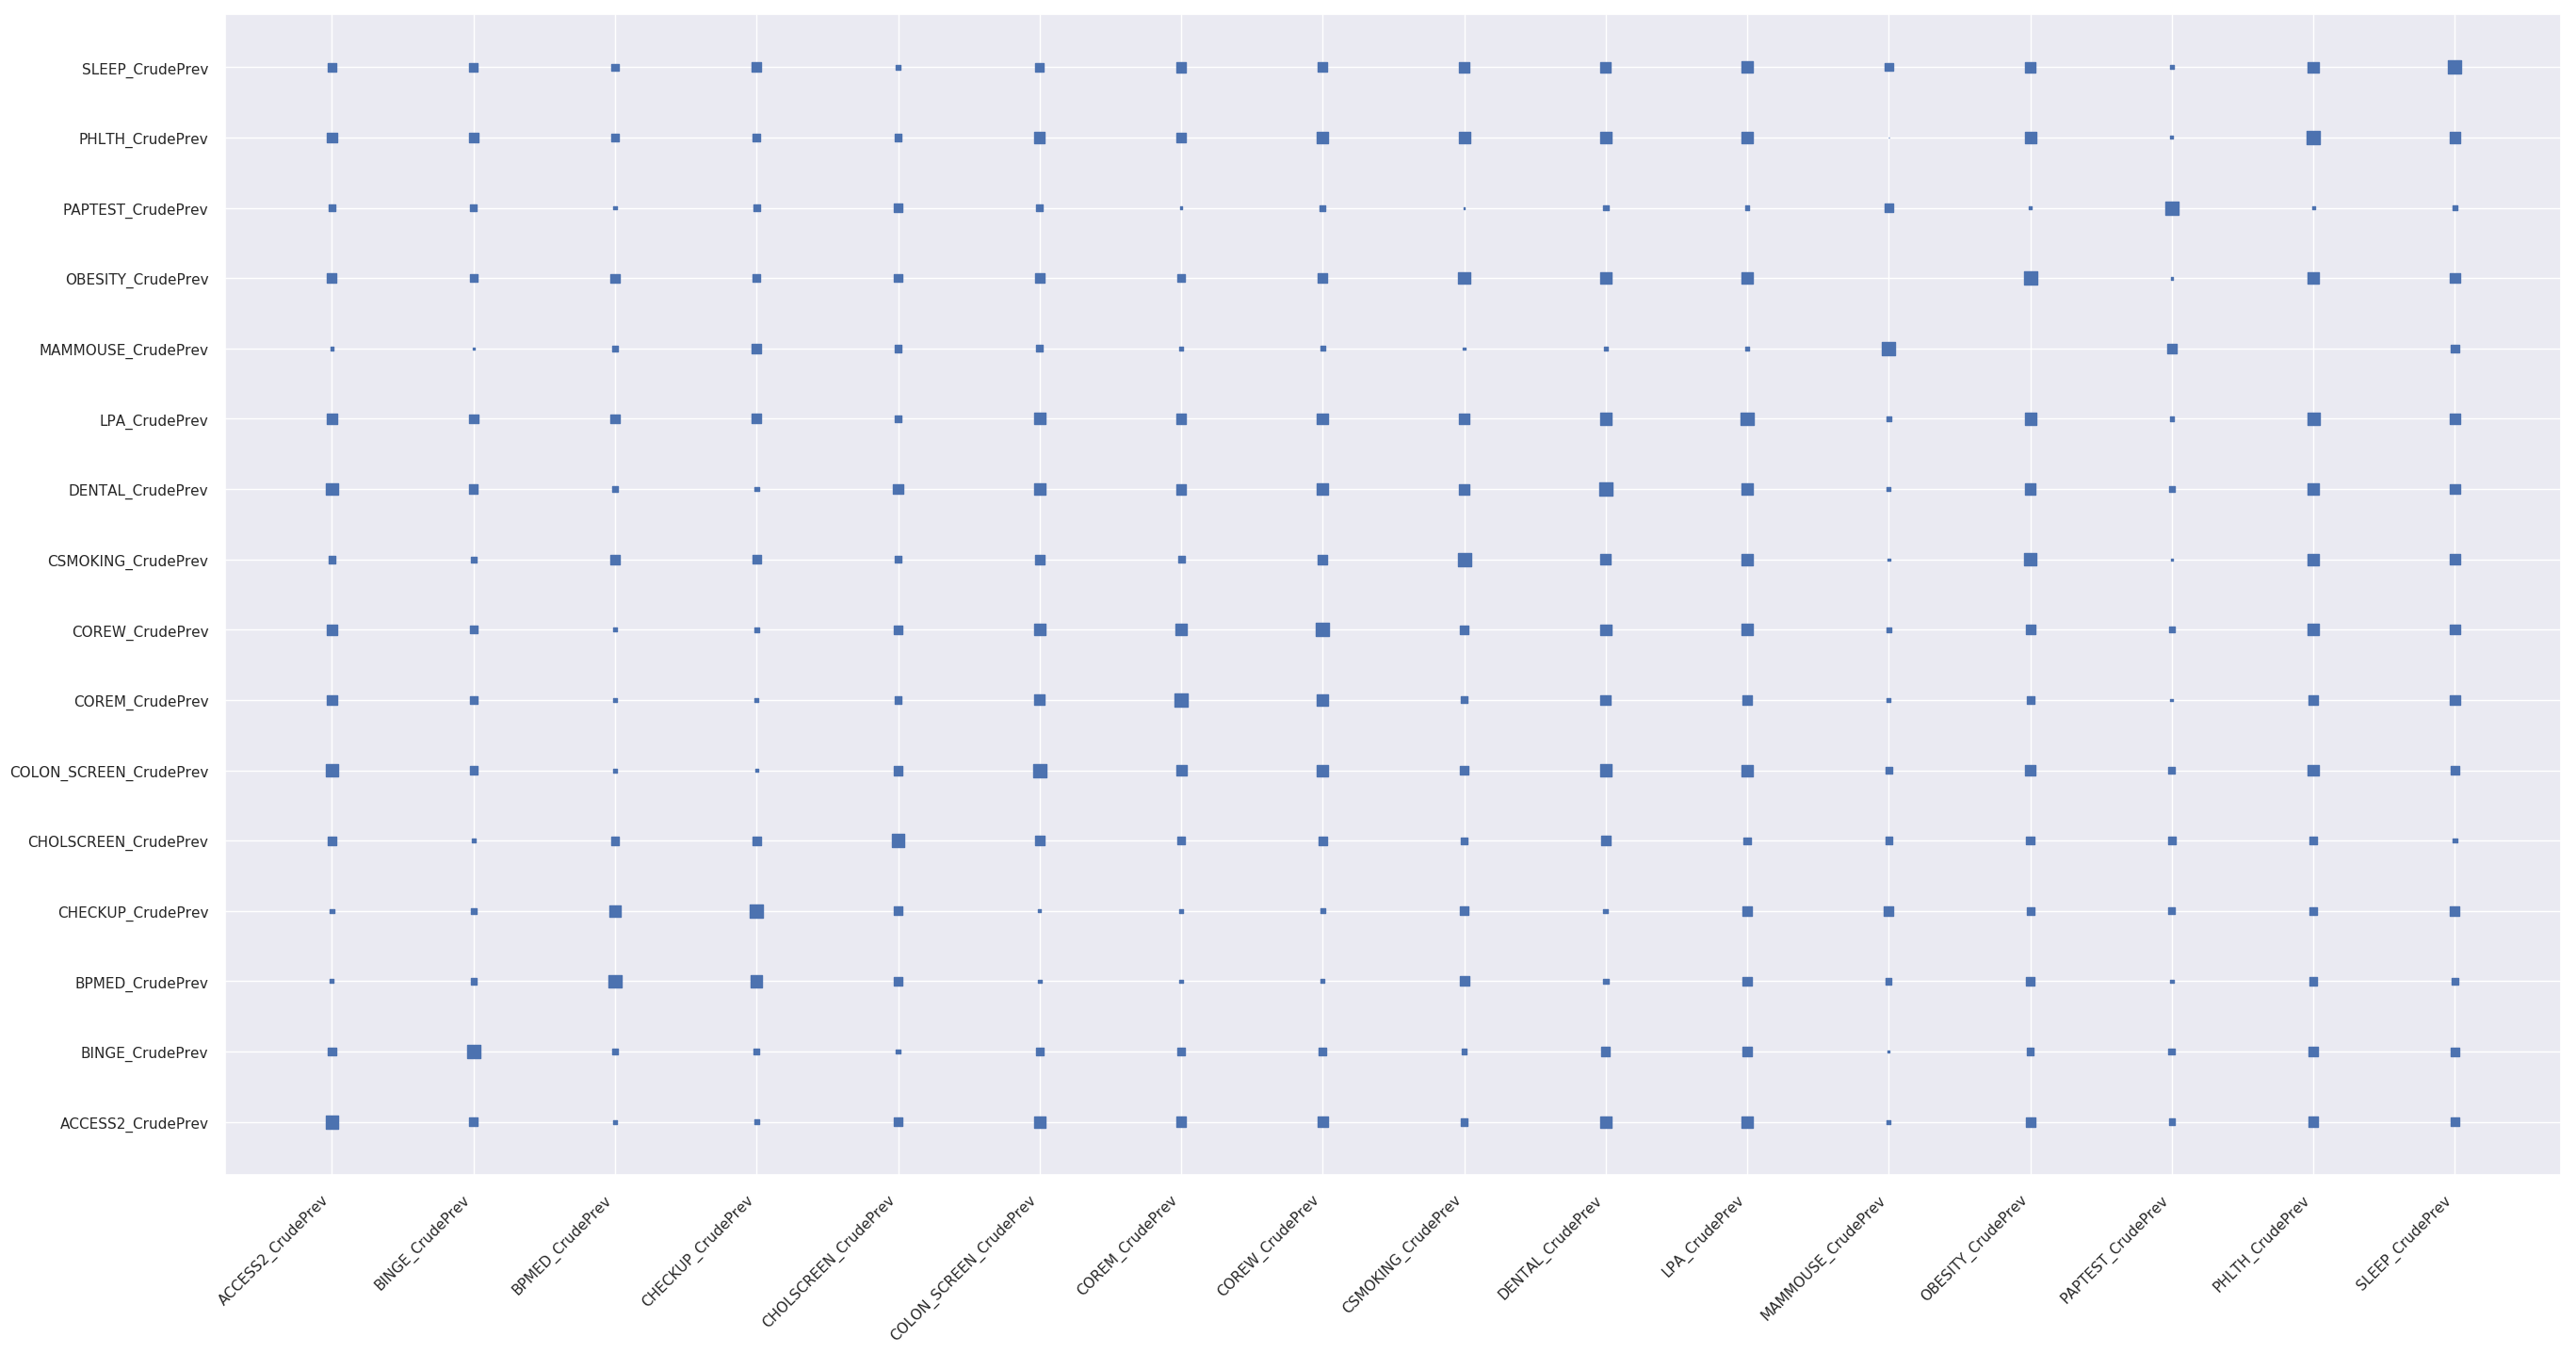

In [0]:
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# plotting the heat map correlation matrix
plt.figure(figsize=(10,10))
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 100
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale , # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = df_500PH
columns = df_500PH.columns
corr = data[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)


In [0]:
# Descriptive stats
df_500PH.describe()

,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,COREM_CrudePrev,COREW_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12.269600,15.453800,68.473600,63.196000,72.545200,72.780400,78.847200,82.8938,63.662000,33.906400,31.212600,17.656200,17.394000,23.992000,29.247600,35.451200
std,2.453576,6.268764,5.575643,7.546653,4.534128,5.215898,3.032861,2.2047,5.834604,5.853081,4.812719,2.684346,4.098042,6.468535,5.753198,4.276531
min,7.100000,4.200000,51.200000,42.300000,55.400000,45.700000,67.400000,73.0000,42.200000,18.900000,17.300000,9.100000,8.600000,10.100000,14.900000,24.200000
25%,10.500000,11.100000,64.300000,57.600000,69.000000,69.600000,76.900000,81.7000,60.100000,30.250000,28.100000,16.000000,14.300000,18.800000,25.100000,32.500000
50%,12.300000,14.100000,67.900000,63.300000,73.000000,72.700000,79.200000,83.0000,64.200000,33.900000,31.250000,17.550000,17.100000,23.850000,29.200000,35.150000
75%,13.925000,18.700000,72.700000,68.700000,76.200000,76.425000,80.925000,84.4000,67.500000,37.625000,34.125000,19.200000,20.100000,28.200000,33.200000,38.100000
max,19.900000,43.800000,82.000000,81.800000,83.100000,84.500000,85.500000,88.4000,76.600000,53.000000,46.100000,27.400000,29.700000,46.800000,49.100000,49.800000


In [0]:
# Descriptive stats
import pandas_profiling
pandas_profiling.ProfileReport(df_500PH)

Number of variables,16
Number of observations,500
Total Missing (%),0.0%
Total size in memory,62.6 KiB
Average record size in memory,128.2 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


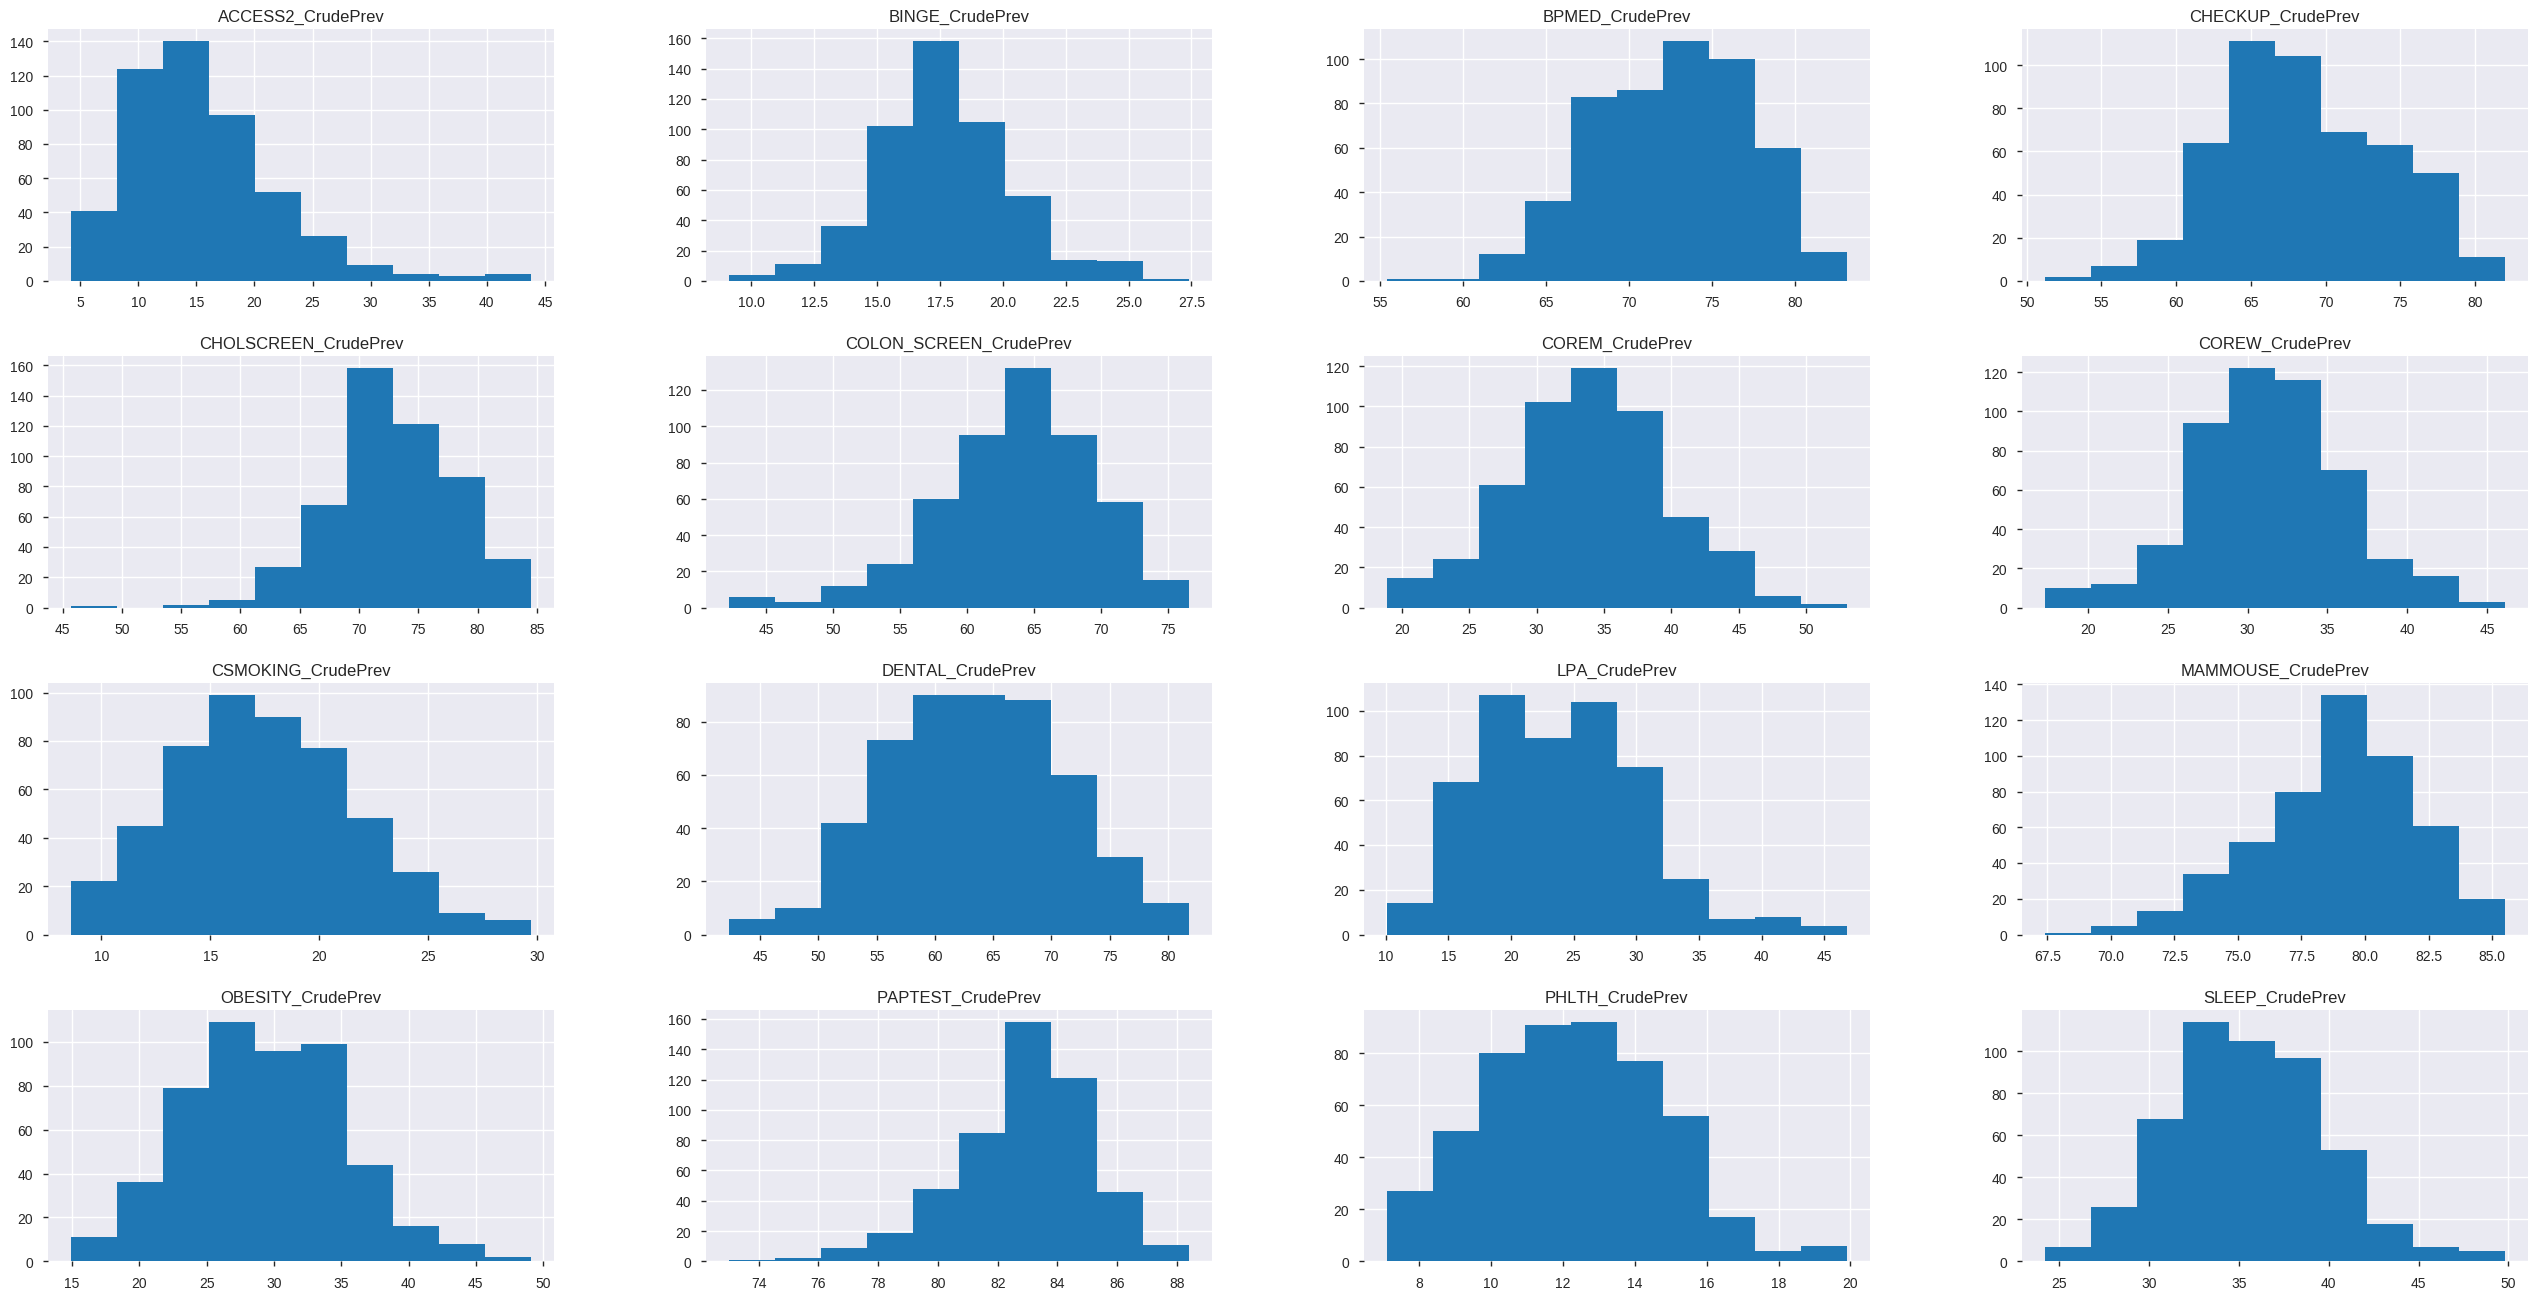

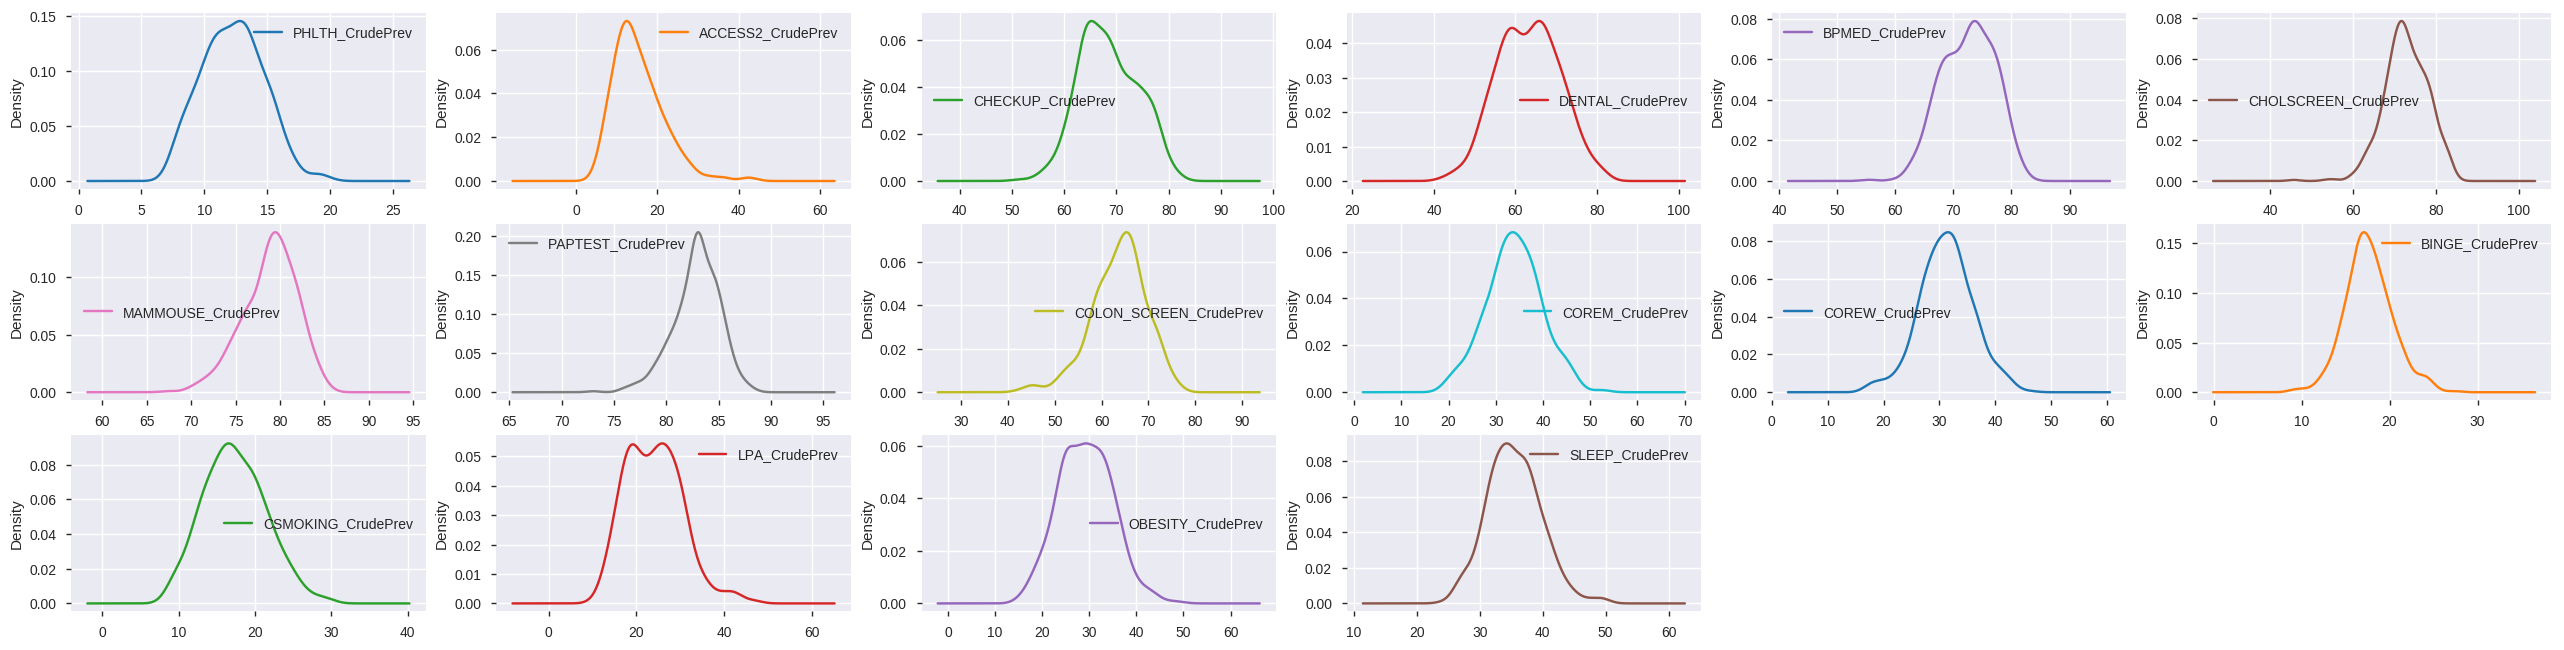

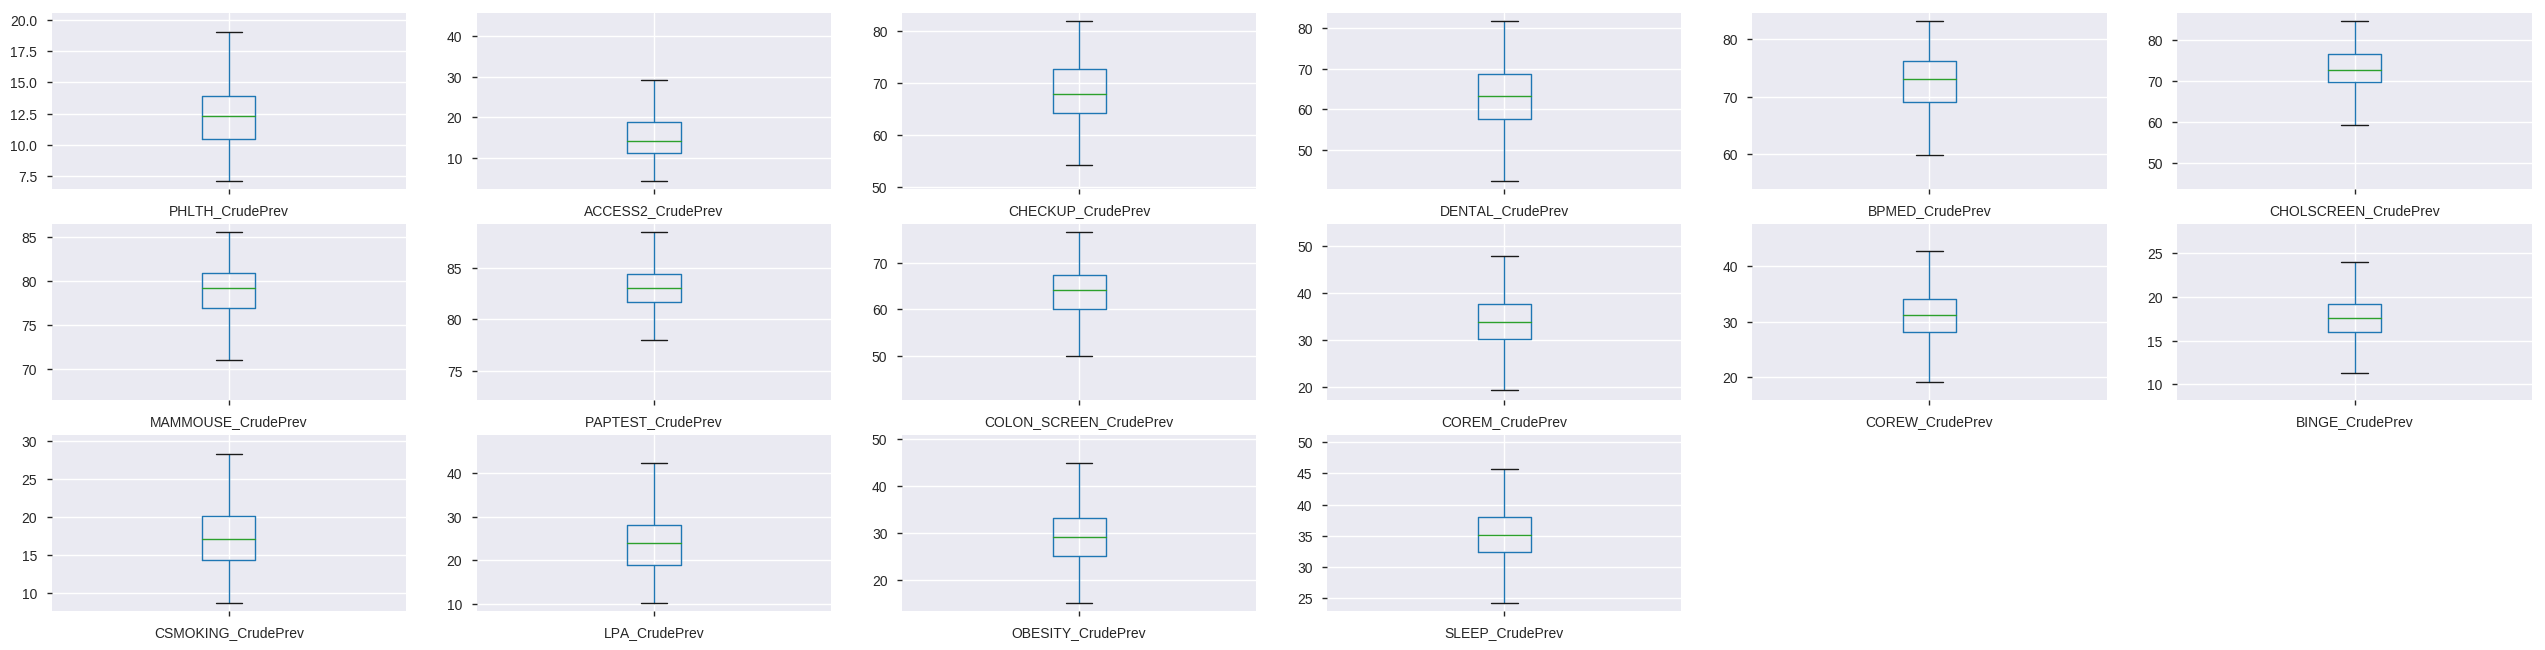

In [0]:
# Three other interesting figures

import numpy
from matplotlib import pyplot
from matplotlib.pyplot import figure

dataset=df_500PH
# Setting graph size
pyplot.rcParams["figure.figsize"] = (32,16)

# histograms
dataset.hist()
pyplot.show()

# density
dataset.plot(kind='density', subplots=True, layout=(6,6), sharex=False)
pyplot.show()

# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
pyplot.show()

dfcols = list(dataset.columns)

pyplot.show()


In [0]:
import seaborn as sns 
sns.set(style='darkgrid', palette='deep')
df_rate = df_500PH[col_names]
sns.pairplot(df_rate, height=3);

## Feature Engineering 

We have two variables for "Up-to-date on a core set of clinical preventive services among men & women aged ≥65 years" - Calculating a new term by averaging both the variables.

Instead of two seperate variables for male and female, we are generalising it into one variable.

In [0]:
Core_Values=(scaled_features_ph.loc[:,'COREM_CrudePrev']+scaled_features_ph.loc[:,'COREW_CrudePrev'])/2
scaled_features_ph.insert(loc=13, column='CORE_CrudePrev', value=Core_Values)
scaled_features_vph=scaled_features_ph.drop(['COREM_CrudePrev','COREW_CrudePrev'],axis=1) # Dropping the columns

scaled_features_vph.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,CORE_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Geolocation
0,CA,Folsom,624638,72203,8.9,0.083333,0.438312,0.820253,0.339350,0.835052,0.718232,0.733766,1.000000,0.544640,0.693989,0.170616,0.114441,0.260234,0.378906,"(38.67504943280, -121.147605753)"
1,FL,Largo,1239425,77648,15.4,0.388889,0.853896,0.412658,0.924188,0.889175,0.458564,0.266234,0.651163,0.493050,0.426230,0.573460,0.569482,0.391813,0.527344,"(27.90909077340, -82.7714203383)"
2,CA,Berkeley,606000,112580,8.2,0.088384,0.438312,0.701266,0.462094,0.626289,0.779006,0.662338,0.965116,0.618061,0.573770,0.123223,0.111717,0.105263,0.312500,"(37.87256787650, -122.274907975)"
3,CA,Napa,650258,76915,12.0,0.204545,0.409091,0.706329,0.534296,0.765464,0.513812,0.707792,0.787791,0.504287,0.551913,0.279621,0.264305,0.266082,0.332031,"(38.29804246490, -122.301093331)"
4,FL,Sunrise,1269700,84439,13.3,0.469697,0.860390,0.473418,0.768953,0.850515,0.834254,0.538961,0.508721,0.324602,0.393443,0.374408,0.528610,0.385965,0.542969,"(26.15468783030, -80.2998411020)"


We are trying to build a Generalised Prevention score for columns based on Young adults. The score is calculated by averaging % of use of basic preventive services:

          1.  ACCESS2_CrudePrev
          2.  CHECKUP_CrudePrev
          3.  DENTAL_CrudePrev
          4.  BPMED_CrudePrev
          5.  CHOLSCREEN_CrudePrev


This score is a healthy score, so we assume this score should not be significant for the model and this should turn out to be least important variable. Lets see how it turns out in the model interpretation.



In [0]:
# Young Prevention Score
# 'ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev'

Prev_Values=(scaled_features_vph.loc[:,'ACCESS2_CrudePrev']+scaled_features_vph.loc[:,'CHECKUP_CrudePrev']+scaled_features_vph.loc[:,'DENTAL_CrudePrev']+
             scaled_features_vph.loc[:,'BPMED_CrudePrev']+scaled_features_vph.loc[:,'CHOLSCREEN_CrudePrev'])/5

scaled_features_vph.insert(loc=19, column='Young_Prevention_Score', value=Prev_Values)
scaled_features_vph.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,CORE_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Young_Prevention_Score,Geolocation
0,CA,Folsom,624638,72203,8.9,0.083333,0.438312,0.820253,0.339350,0.835052,0.718232,0.733766,1.000000,0.544640,0.693989,0.170616,0.114441,0.260234,0.378906,0.503260,"(38.67504943280, -121.147605753)"
1,FL,Largo,1239425,77648,15.4,0.388889,0.853896,0.412658,0.924188,0.889175,0.458564,0.266234,0.651163,0.493050,0.426230,0.573460,0.569482,0.391813,0.527344,0.693761,"(27.90909077340, -82.7714203383)"
2,CA,Berkeley,606000,112580,8.2,0.088384,0.438312,0.701266,0.462094,0.626289,0.779006,0.662338,0.965116,0.618061,0.573770,0.123223,0.111717,0.105263,0.312500,0.463269,"(37.87256787650, -122.274907975)"
3,CA,Napa,650258,76915,12.0,0.204545,0.409091,0.706329,0.534296,0.765464,0.513812,0.707792,0.787791,0.504287,0.551913,0.279621,0.264305,0.266082,0.332031,0.523945,"(38.29804246490, -122.301093331)"
4,FL,Sunrise,1269700,84439,13.3,0.469697,0.860390,0.473418,0.768953,0.850515,0.834254,0.538961,0.508721,0.324602,0.393443,0.374408,0.528610,0.385965,0.542969,0.684595,"(26.15468783030, -80.2998411020)"


Similarly building an unhealthy behavior score using columns:


    1.   BINGE_CrudePrev
    2.   CSMOKING_CrudePrev
    3.   LPA_CrudePrev
    4.   OBESITY_CrudePrev
    5.   SLEEP_CrudePrev

This gives an intuitive feeling that this can be a significant contributor as every variable is unhealthy behavior.


In [0]:
# Unhealthy Behavior Score

UHB_Values=(scaled_features_vph.loc[:,'BINGE_CrudePrev']+scaled_features_vph.loc[:,'CSMOKING_CrudePrev']+scaled_features_vph.loc[:,'LPA_CrudePrev']+
             scaled_features_vph.loc[:,'OBESITY_CrudePrev']+scaled_features_vph.loc[:,'SLEEP_CrudePrev'])/5

scaled_features_vph.insert(loc=20, column='Unhealthy_Behavior_Score', value=UHB_Values)
scaled_features_vph.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,CORE_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Young_Prevention_Score,Unhealthy_Behavior_Score,Geolocation
0,CA,Folsom,624638,72203,8.9,0.083333,0.438312,0.820253,0.339350,0.835052,0.718232,0.733766,1.000000,0.544640,0.693989,0.170616,0.114441,0.260234,0.378906,0.503260,0.323637,"(38.67504943280, -121.147605753)"
1,FL,Largo,1239425,77648,15.4,0.388889,0.853896,0.412658,0.924188,0.889175,0.458564,0.266234,0.651163,0.493050,0.426230,0.573460,0.569482,0.391813,0.527344,0.693761,0.497666,"(27.90909077340, -82.7714203383)"
2,CA,Berkeley,606000,112580,8.2,0.088384,0.438312,0.701266,0.462094,0.626289,0.779006,0.662338,0.965116,0.618061,0.573770,0.123223,0.111717,0.105263,0.312500,0.463269,0.245295,"(37.87256787650, -122.274907975)"
3,CA,Napa,650258,76915,12.0,0.204545,0.409091,0.706329,0.534296,0.765464,0.513812,0.707792,0.787791,0.504287,0.551913,0.279621,0.264305,0.266082,0.332031,0.523945,0.338790,"(38.29804246490, -122.301093331)"
4,FL,Sunrise,1269700,84439,13.3,0.469697,0.860390,0.473418,0.768953,0.850515,0.834254,0.538961,0.508721,0.324602,0.393443,0.374408,0.528610,0.385965,0.542969,0.684595,0.445079,"(26.15468783030, -80.2998411020)"


In [0]:
UHS=(scaled_features_vph[['Unhealthy_Behavior_Score','StateAbbr']]).groupby('StateAbbr' , as_index = False).max()
UHS.shape
UHS[['Unhealthy_Behavior_Score','StateAbbr']][UHS['Unhealthy_Behavior_Score']>0.7]

,Unhealthy_Behavior_Score,StateAbbr
15,0.734985,IN
22,0.776254,MI
31,0.767471,NJ
35,0.724236,OH


In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

import plotly
plotly.tools.set_credentials_file(username='VineelaD', api_key='5wHemEGx5ZgOkdzqOzV5')

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data1 = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = UHS['StateAbbr'], 
    z = UHS['Unhealthy_Behavior_Score'].astype(float),
    locationmode = 'USA-states',
#     text = UHS['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Crude Prevelance Score")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Unhealthy Behavior Score'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig1 = go.Figure(data = data1, layout = layout)
py.iplot(fig1, filename = 'd3-cloropleth-map')

## Data Preparation 

In [0]:
#Setting Random seed
import random
random.seed(123)

# Shuffling the rows in the dataset
from sklearn.utils import shuffle
scaled_features_vph = shuffle(scaled_features_vph) # Shuffling
scaled_features_vph.reset_index(inplace=True, drop=True) # Resetting the previous index
scaled_features_vph.shape


(500, 22)

In [0]:
Y=scaled_features_vph['PHLTH_CrudePrev']
column_names=['ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','CORE_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev','Young_Prevention_Score','Unhealthy_Behavior_Score']
X=scaled_features_vph[column_names]
# Training, Validation and Test set to 80%, 10% and 10% respectively
from sklearn.model_selection import train_test_split

X_train, X_tmp, Y_train, Y_tmp = train_test_split( X, Y,
                                         train_size=0.8, random_state=123)

X_val, X_test, Y_val, Y_test   = train_test_split(
                                        X_tmp, Y_tmp, train_size=0.5, random_state=123)

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)
print(X_test.shape, Y_test.shape)

(400, 16) (400,)
(50, 16) (50,)
(50, 16) (50,)


## Model Fitting 

***Model 0***

In [0]:
prediction=Y_train.mean()

# Predicted Values
y_pred = [prediction for i in range(len(Y_train))]
# y_pred = [prediction for i in range(len(Y_val))]
# y_pred = [prediction for i in range(len(Y_test))]

***Model 1***

In [0]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

seed=123
num_folds=5
scoring = 'neg_mean_squared_error'

startTime = datetime.now()
# Tune scaled Random Forest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([100,200,300,400,500,600,700])) # Num of estimators is an important paramter to estimate the number of trees to best tune to model
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) #500
grid_resultRF = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_resultRF.best_score_, grid_resultRF.best_params_))
means = grid_resultRF.cv_results_['mean_test_score']
stds = grid_resultRF.cv_results_['std_test_score']
params = grid_resultRF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('\nTime taken to Tune Random Forest')
print(datetime.now() - startTime)

# Identified the optimum estimators as 500

Best: -0.975014 using {'n_estimators': 400}
-0.997789 (0.157601) with: {'n_estimators': 100}
-0.980631 (0.168916) with: {'n_estimators': 200}
-0.976171 (0.166406) with: {'n_estimators': 300}
-0.975014 (0.167820) with: {'n_estimators': 400}
-0.983510 (0.167635) with: {'n_estimators': 500}
-0.984110 (0.169954) with: {'n_estimators': 600}
-0.984219 (0.169907) with: {'n_estimators': 700}

Time taken to Tune Random Forest
0:00:36.979617


***Model 2***

In [0]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

seed=123
num_folds=5
scoring = 'neg_mean_squared_error'

startTime = datetime.now()
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([100,200,300,400,500,600,700,800])) # Num of estimators is an important paramter to estimate the number of trees to best tune to model
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) #700
grid_resultGBM = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_resultGBM.best_score_, grid_resultGBM.best_params_))
means = grid_resultGBM.cv_results_['mean_test_score']
stds = grid_resultGBM.cv_results_['std_test_score']
params = grid_resultGBM.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print('\nTime taken to Tune Gradient Boost')
print(datetime.now() - startTime)

# Identified the optimum estimators as 700

Best: -0.842002 using {'n_estimators': 800}
-0.867817 (0.133574) with: {'n_estimators': 100}
-0.854739 (0.145464) with: {'n_estimators': 200}
-0.847075 (0.145570) with: {'n_estimators': 300}
-0.845192 (0.147297) with: {'n_estimators': 400}
-0.845319 (0.148562) with: {'n_estimators': 500}
-0.843513 (0.149338) with: {'n_estimators': 600}
-0.842288 (0.149900) with: {'n_estimators': 700}
-0.842002 (0.150282) with: {'n_estimators': 800}

Time taken to Tune Gradient Boost
0:00:10.758725


## Model Interpretability 

In [0]:
import numpy as np

def mean_absolute_percentage_error(y_actual, y_pred):
  y_actual, y_pred = np.array(y_actual), np.array(y_pred)
  return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

def sd_absolute_error(y_actual, y_pred):
  return pd.DataFrame.std(abs(y_pred - y_actual))

def sd_mape(y_actual, y_pred):
  return pd.DataFrame.std(np.abs((y_actual - y_pred) / y_actual)) * 100

def bias(y_actual, y_pred):
  return np.mean((y_pred - y_actual))

In [0]:
!pip install pdpbox

Model 0

,Type,MAE,sd(AE),MAPE,sd(MAPE),RMSE,BIAS
2,Test,1.816000,1.051789,15.796790,11.764596,2.09332,3.450000e-02
1,Validation,2.175780,1.559955,19.593465,16.044246,2.66811,2.145000e-01
0,Training,2.006582,1.432455,17.428747,14.316498,2.46438,1.252332e-15


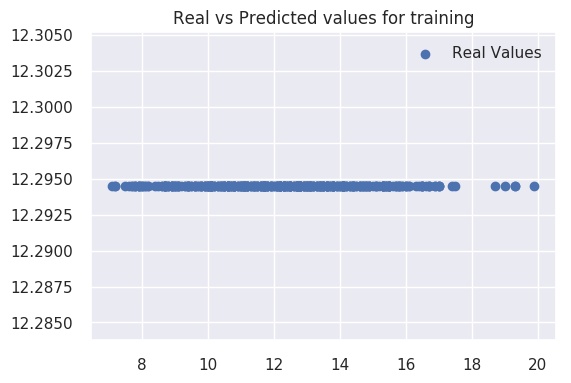

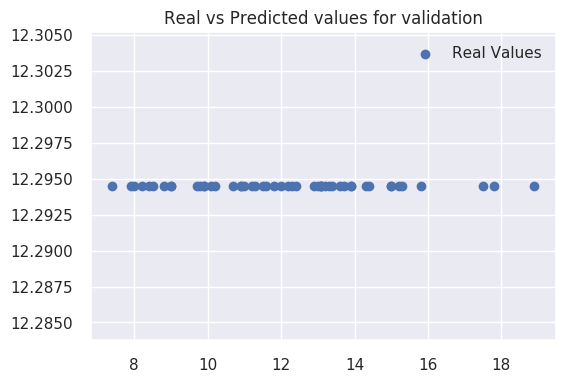

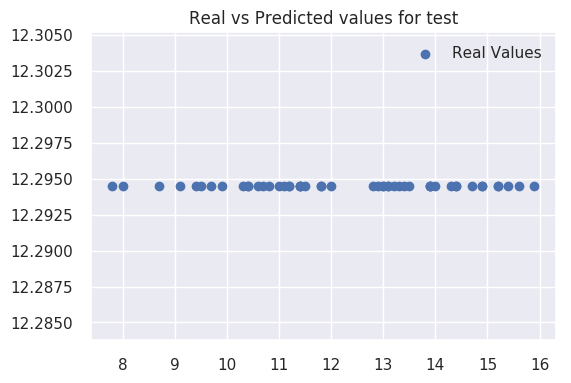

In [0]:
# Baseline model
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt

#Training
y_pred = [prediction for i in range(len(Y_train))]

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_train,y_pred)
plt.title('Real vs Predicted values for training')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Training data
MAE = metrics.mean_absolute_error(Y_train,y_pred)
MAPE = mean_absolute_percentage_error(Y_train, y_pred)
sdAE = sd_absolute_error(Y_train,y_pred)
sdMAPE = sd_mape(Y_train,y_pred)
BIAS = bias(Y_train,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train,y_pred))


#Validation
y_pred = [prediction for i in range(len(Y_val))]

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_val,y_pred)
plt.title('Real vs Predicted values for validation')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Validation data
VMAE = metrics.mean_absolute_error(Y_val,y_pred)
VMAPE = mean_absolute_percentage_error(Y_val, y_pred)
VsdAE = sd_absolute_error(Y_val,y_pred)
VsdMAPE = sd_mape(Y_val,y_pred)
VBIAS = bias(Y_val,y_pred)
VRMSE = np.sqrt(metrics.mean_squared_error(Y_val,y_pred))

#Test
y_pred = [prediction for i in range(len(Y_test))]

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_test,y_pred)
plt.title('Real vs Predicted values for test')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on test data
TMAE = metrics.mean_absolute_error(Y_test,y_pred)
TMAPE = mean_absolute_percentage_error(Y_test, y_pred)
TsdAE = sd_absolute_error(Y_test,y_pred)
TsdMAPE = sd_mape(Y_test,y_pred)
TBIAS = bias(Y_test,y_pred)
TRMSE = np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

Error_metrics = pd.DataFrame(columns=['Type', 'MAE', 'sd(AE)', 'MAPE', 'sd(MAPE)', 'RMSE', 'BIAS'])
new_row = pd.DataFrame({'Type':'Training', 'MAE': MAE ,'sd(AE)': sdAE, 'MAPE': MAPE, 'sd(MAPE)':sdMAPE, 'RMSE': RMSE, 'BIAS': BIAS }, index =[0]) 
# Append values to Dataframe
Error_metrics = Error_metrics.append([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Validation', 'MAE': VMAE ,'sd(AE)': VsdAE, 'MAPE': VMAPE, 'sd(MAPE)':VsdMAPE, 'RMSE': VRMSE, 'BIAS': VBIAS  }, index =[1]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Test', 'MAE': TMAE ,'sd(AE)': TsdAE, 'MAPE': TMAPE, 'sd(MAPE)':TsdMAPE,  'RMSE': TRMSE, 'BIAS': TBIAS  }, index =[2]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])

Error_metrics

Model 1

,Type,MAE,sd(AE),MAPE,sd(MAPE),RMSE,BIAS
2,Test,1.609630,0.947057,14.151189,10.984820,1.862763,0.119580
1,Validation,1.961845,1.344560,18.005875,15.226991,2.370764,0.325425
0,Training,1.765543,1.262674,15.619418,13.564425,2.169678,0.133293


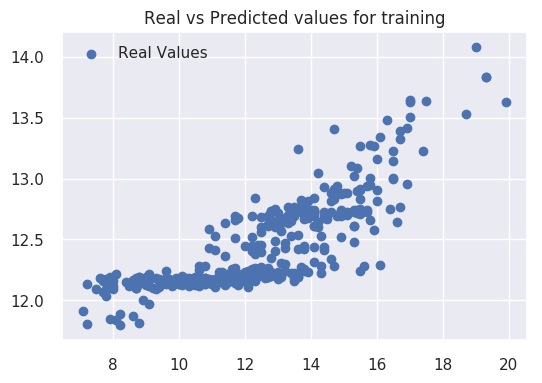

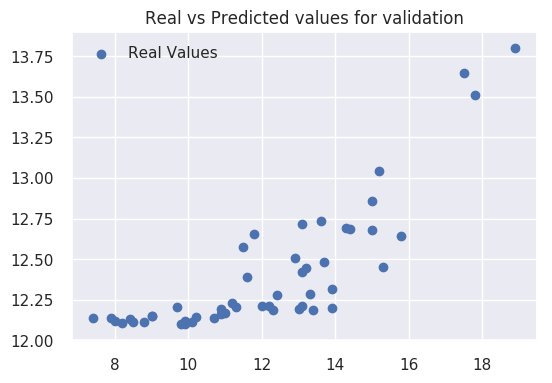

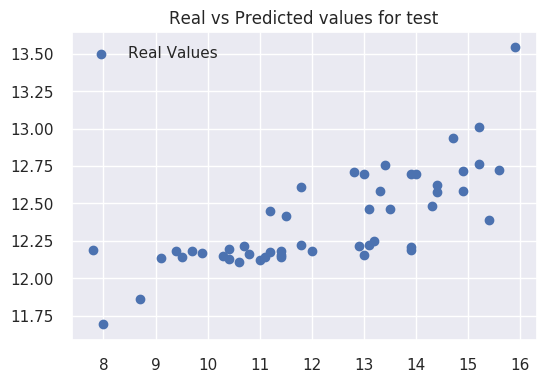

In [0]:
# Random Forest
from sklearn import metrics
from pandas import DataFrame

# Training Data
y_pred = grid_resultRF.predict(X_train)

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_train,y_pred)
plt.title('Real vs Predicted values for training')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Training data
MAE = metrics.mean_absolute_error(Y_train,y_pred)
MAPE = mean_absolute_percentage_error(Y_train, y_pred)
sdAE = sd_absolute_error(Y_train,y_pred)
sdMAPE = sd_mape(Y_train,y_pred)
BIAS = bias(Y_train,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train,y_pred))

# Validation Data
y_pred = grid_resultRF.predict(X_val)

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_val,y_pred)
plt.title('Real vs Predicted values for validation')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Validation data
VMAE = metrics.mean_absolute_error(Y_val,y_pred)
VMAPE = mean_absolute_percentage_error(Y_val, y_pred)
VsdAE = sd_absolute_error(Y_val,y_pred)
VsdMAPE = sd_mape(Y_val,y_pred)
VBIAS = bias(Y_val,y_pred)
VRMSE = np.sqrt(metrics.mean_squared_error(Y_val,y_pred))

#Test Data
y_pred = grid_resultRF.predict(X_test)

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_test,y_pred)
plt.title('Real vs Predicted values for test')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on test data
TMAE = metrics.mean_absolute_error(Y_test,y_pred)
TMAPE = mean_absolute_percentage_error(Y_test, y_pred)
TsdAE = sd_absolute_error(Y_test,y_pred)
TsdMAPE = sd_mape(Y_test,y_pred)
TBIAS = bias(Y_test,y_pred)
TRMSE = np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

Error_metrics = pd.DataFrame(columns=['Type', 'MAE', 'sd(AE)', 'MAPE', 'sd(MAPE)', 'RMSE', 'BIAS'])
new_row = pd.DataFrame({'Type':'Training', 'MAE': MAE ,'sd(AE)': sdAE, 'MAPE': MAPE, 'sd(MAPE)':sdMAPE, 'RMSE': RMSE, 'BIAS': BIAS }, index =[0]) 
# Append values to Dataframe
Error_metrics = Error_metrics.append([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Validation', 'MAE': VMAE ,'sd(AE)': VsdAE, 'MAPE': VMAPE, 'sd(MAPE)':VsdMAPE, 'RMSE': VRMSE, 'BIAS': VBIAS  }, index =[1]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Test', 'MAE': TMAE ,'sd(AE)': TsdAE, 'MAPE': TMAPE, 'sd(MAPE)':TsdMAPE,  'RMSE': TRMSE, 'BIAS': TBIAS  }, index =[2]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])

Error_metrics

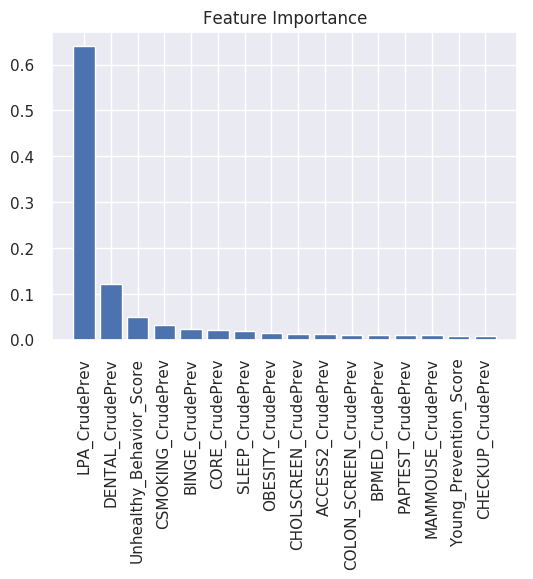

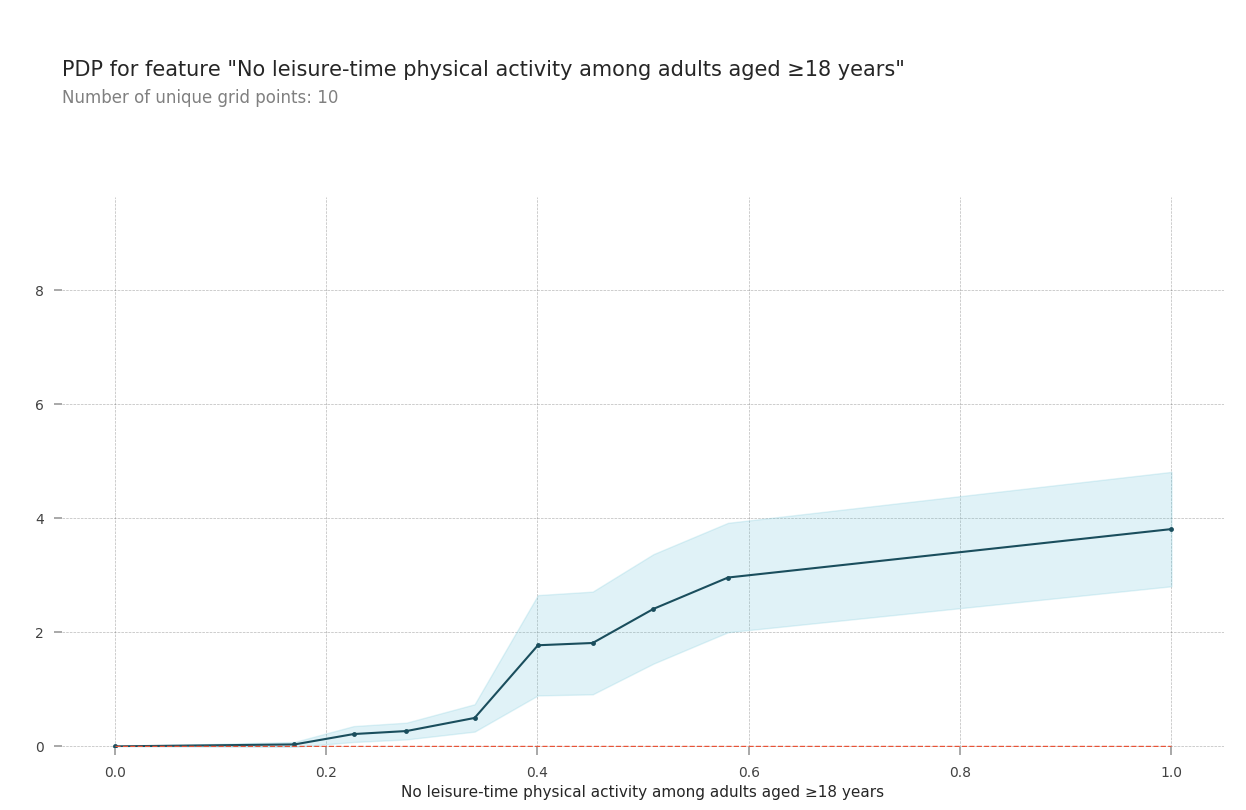

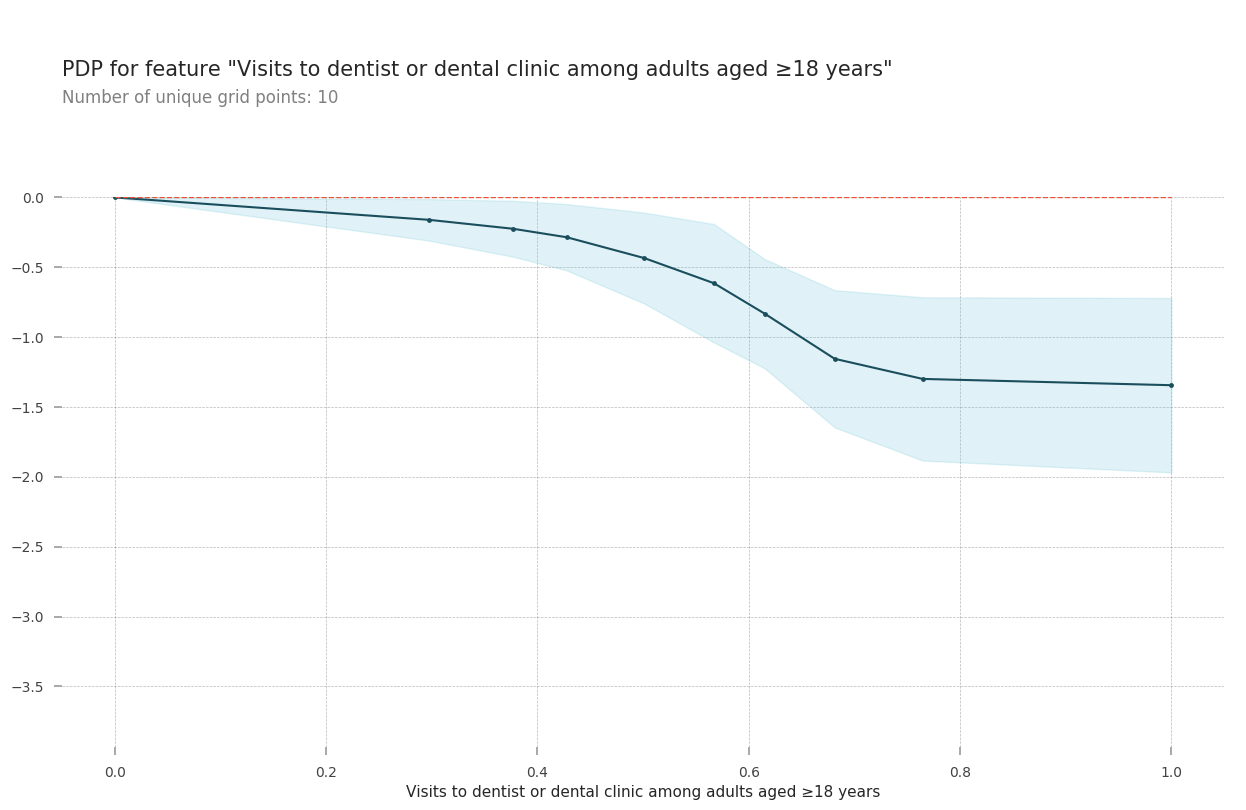

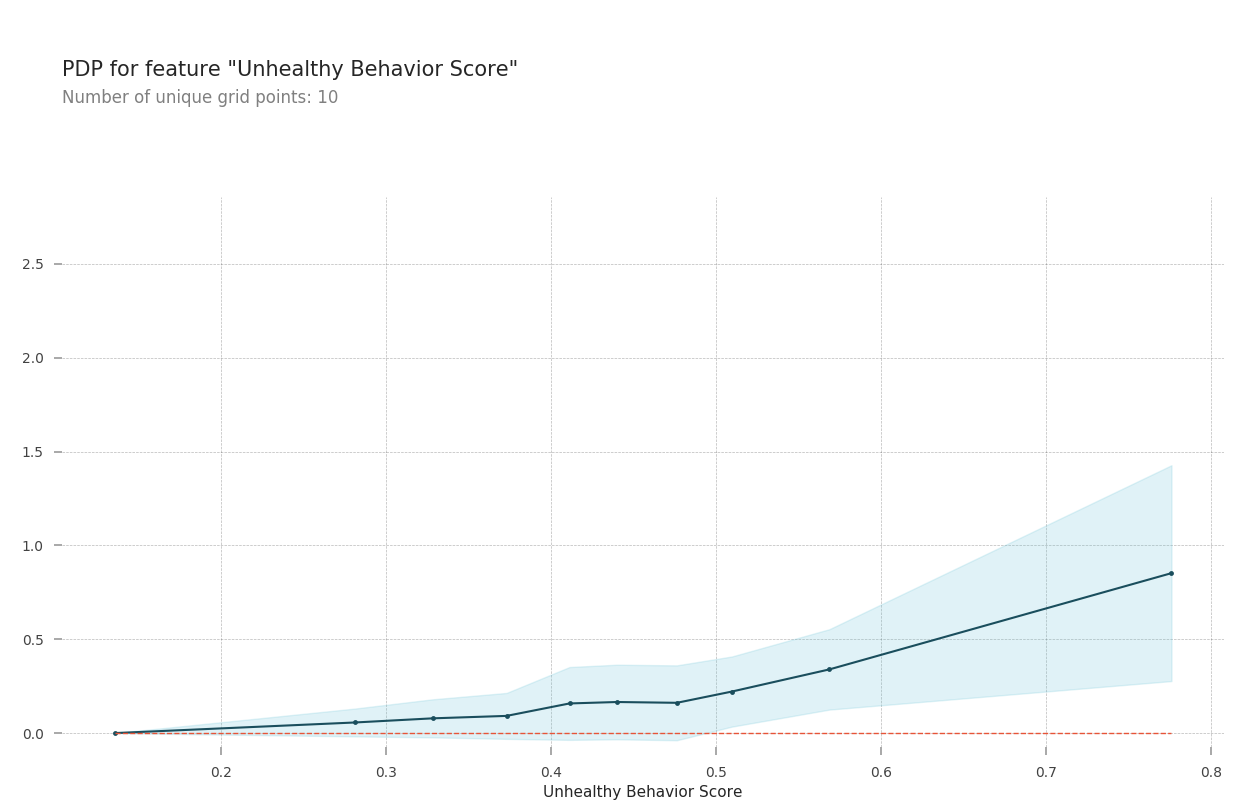

In [0]:
from pdpbox import pdp, get_dataset, info_plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# specify and fit the actual model
model = RandomForestRegressor(n_estimators=500, max_features=16)
model.fit(X_train, Y_train)

# feature_importances can be different for every model
# The order is the order of the features in your feature vectors
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(6,4))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

#Partial Dependence Plots
# plt_params ={ 'line_cmap': 'Greens','pdp_color': '#1a5d4b','pdp_hl_color': '1a5d4b','fill_color': '#66d7b4'}
# LPA_CrudePrev
pdp_lpa = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='LPA_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_lpa, 'No leisure-time physical activity among adults aged ≥18 years') #, plot_params=plt_params)
# DENTAL_CrudePrev
pdp_Dental = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='DENTAL_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_Dental, 'Visits to dentist or dental clinic among adults aged ≥18 years') #, plot_params=plt_params)
# Unhealthy Behavior Score
pdp_UHS = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='Unhealthy_Behavior_Score')
fig, axes = pdp.pdp_plot(pdp_UHS, 'Unhealthy Behavior Score')#, plot_params=plt_params)

Model 2

,Type,MAE,sd(AE),MAPE,sd(MAPE),RMSE,BIAS
2,Test,1.573692,0.962406,13.827809,11.176285,1.839621,0.085766
1,Validation,1.907446,1.323703,17.397415,14.627338,2.314195,0.261395
0,Training,1.764792,1.238927,15.529199,13.113435,2.155364,0.101273


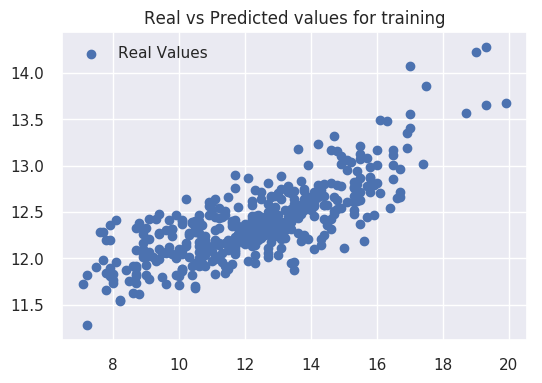

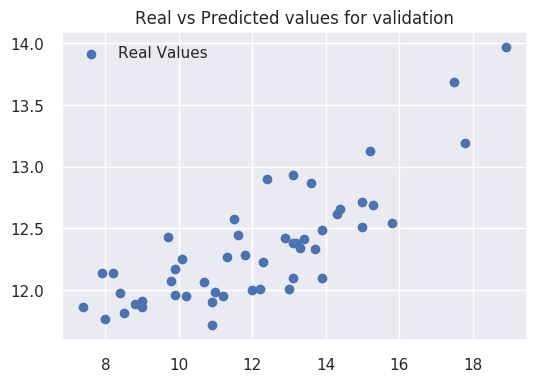

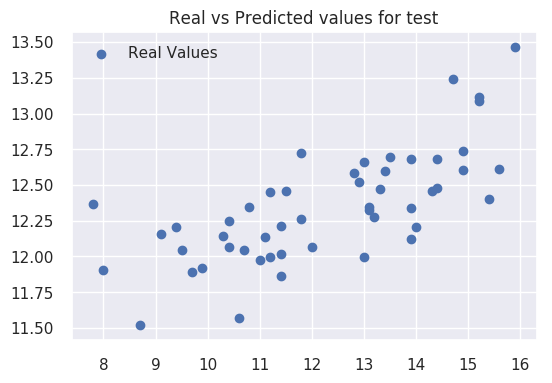

In [0]:
# Gradient Boosting
from sklearn import metrics
from pandas import DataFrame

# Training Data
y_pred = grid_resultGBM.predict(X_train)

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_train,y_pred)
plt.title('Real vs Predicted values for training')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Training data
MAE = metrics.mean_absolute_error(Y_train,y_pred)
MAPE = mean_absolute_percentage_error(Y_train, y_pred)
sdAE = sd_absolute_error(Y_train,y_pred)
sdMAPE = sd_mape(Y_train,y_pred)
BIAS = bias(Y_train,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train,y_pred))

# Validation Data
y_pred = grid_resultGBM.predict(X_val)

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_val,y_pred)
plt.title('Real vs Predicted values for validation')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Validation data
VMAE = metrics.mean_absolute_error(Y_val,y_pred)
VMAPE = mean_absolute_percentage_error(Y_val, y_pred)
VsdAE = sd_absolute_error(Y_val,y_pred)
VsdMAPE = sd_mape(Y_val,y_pred)
VBIAS = bias(Y_val,y_pred)
VRMSE = np.sqrt(metrics.mean_squared_error(Y_val,y_pred))

# Test Data
y_pred = grid_resultGBM.predict(X_test)

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_test,y_pred)
plt.title('Real vs Predicted values for test')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on test data
TMAE = metrics.mean_absolute_error(Y_test,y_pred)
TMAPE = mean_absolute_percentage_error(Y_test, y_pred)
TsdAE = sd_absolute_error(Y_test,y_pred)
TsdMAPE = sd_mape(Y_test,y_pred)
TBIAS = bias(Y_test,y_pred)
TRMSE = np.sqrt(metrics.mean_squared_error(Y_test,y_pred))

Error_metrics = pd.DataFrame(columns=['Type', 'MAE', 'sd(AE)', 'MAPE', 'sd(MAPE)', 'RMSE', 'BIAS'])
new_row = pd.DataFrame({'Type':'Training', 'MAE': MAE ,'sd(AE)': sdAE, 'MAPE': MAPE, 'sd(MAPE)':sdMAPE, 'RMSE': RMSE, 'BIAS': BIAS }, index =[0]) 
# Append values to Dataframe
Error_metrics = Error_metrics.append([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Validation', 'MAE': VMAE ,'sd(AE)': VsdAE, 'MAPE': VMAPE, 'sd(MAPE)':VsdMAPE, 'RMSE': VRMSE, 'BIAS': VBIAS  }, index =[1]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Test', 'MAE': TMAE ,'sd(AE)': TsdAE, 'MAPE': TMAPE, 'sd(MAPE)':TsdMAPE,  'RMSE': TRMSE, 'BIAS': TBIAS  }, index =[2]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])

Error_metrics

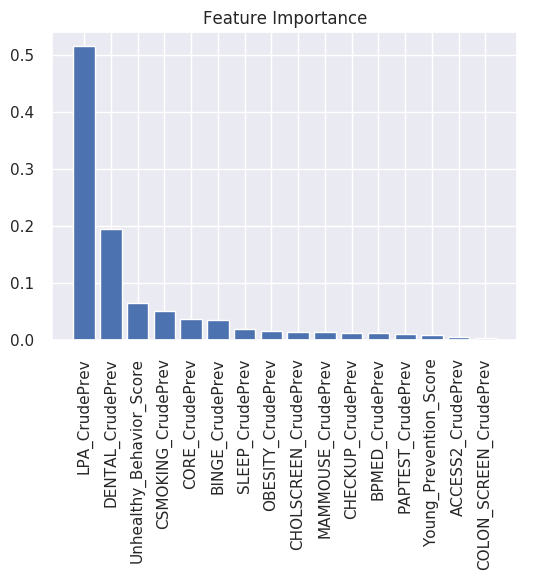

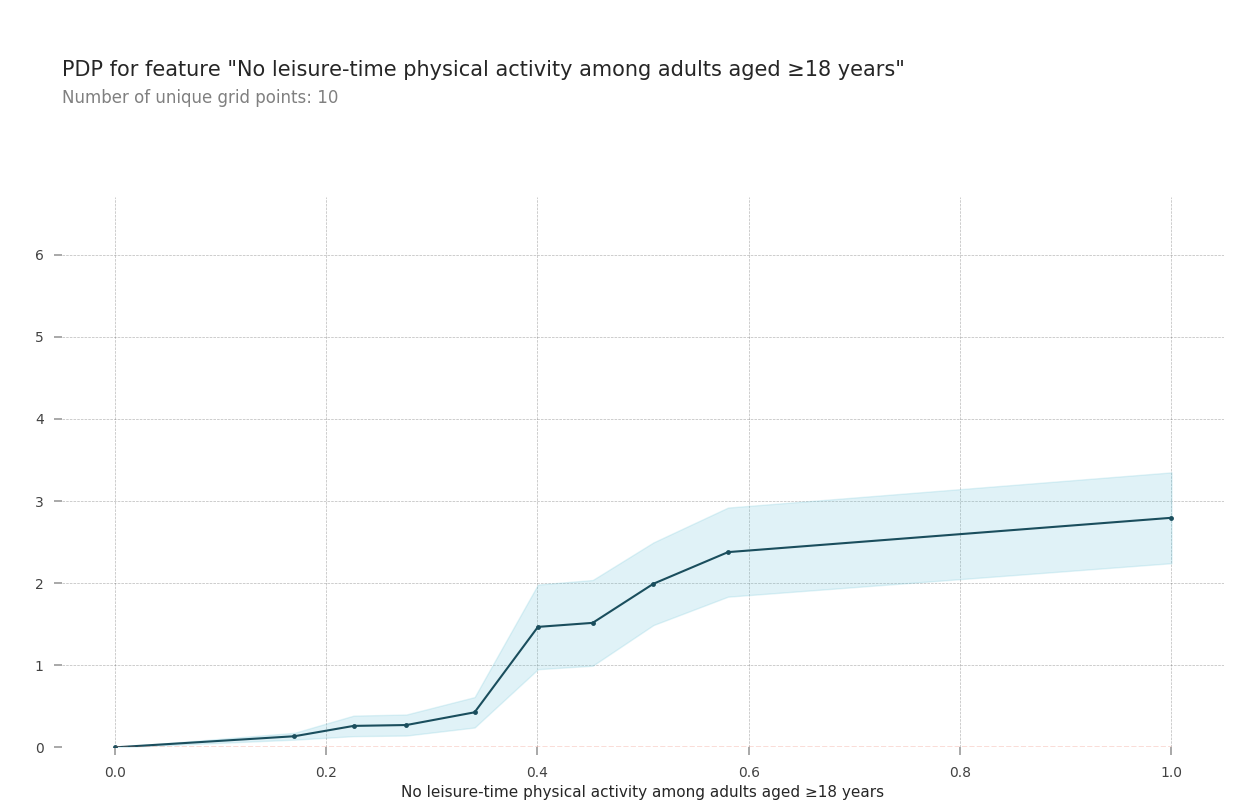

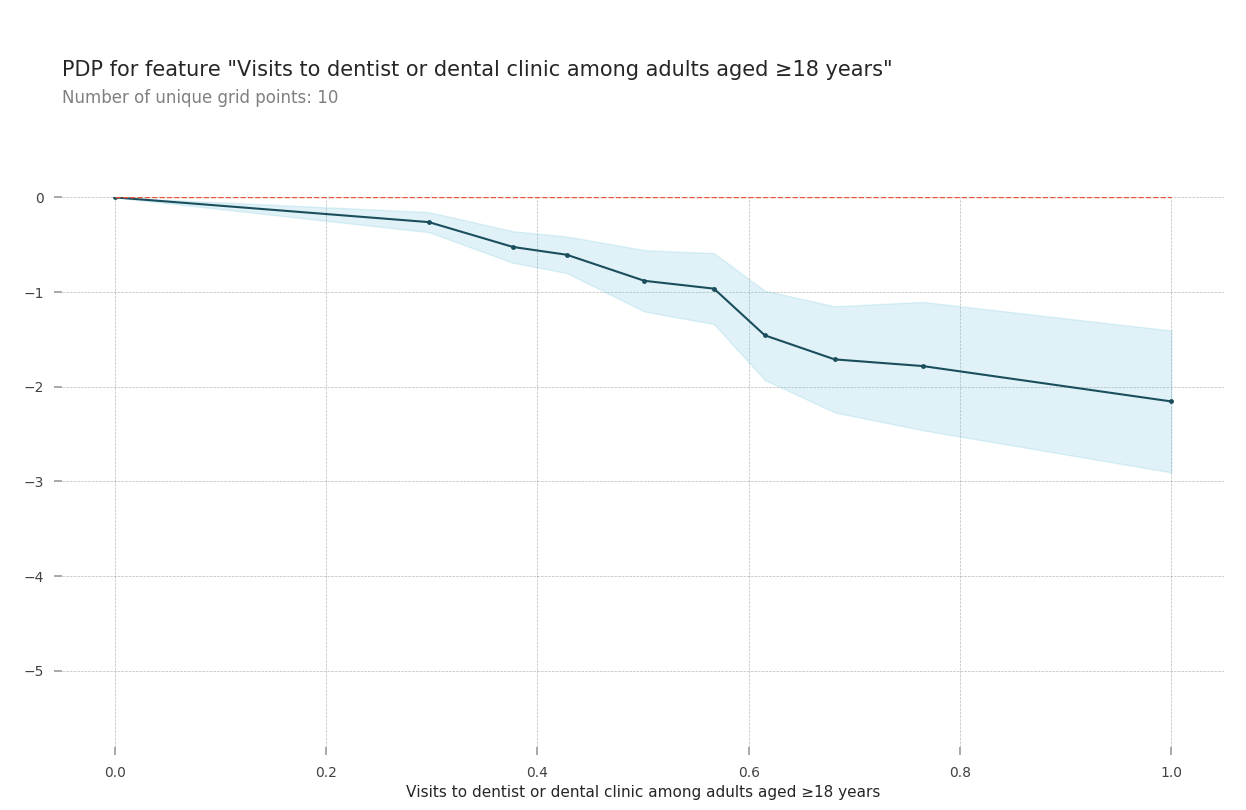

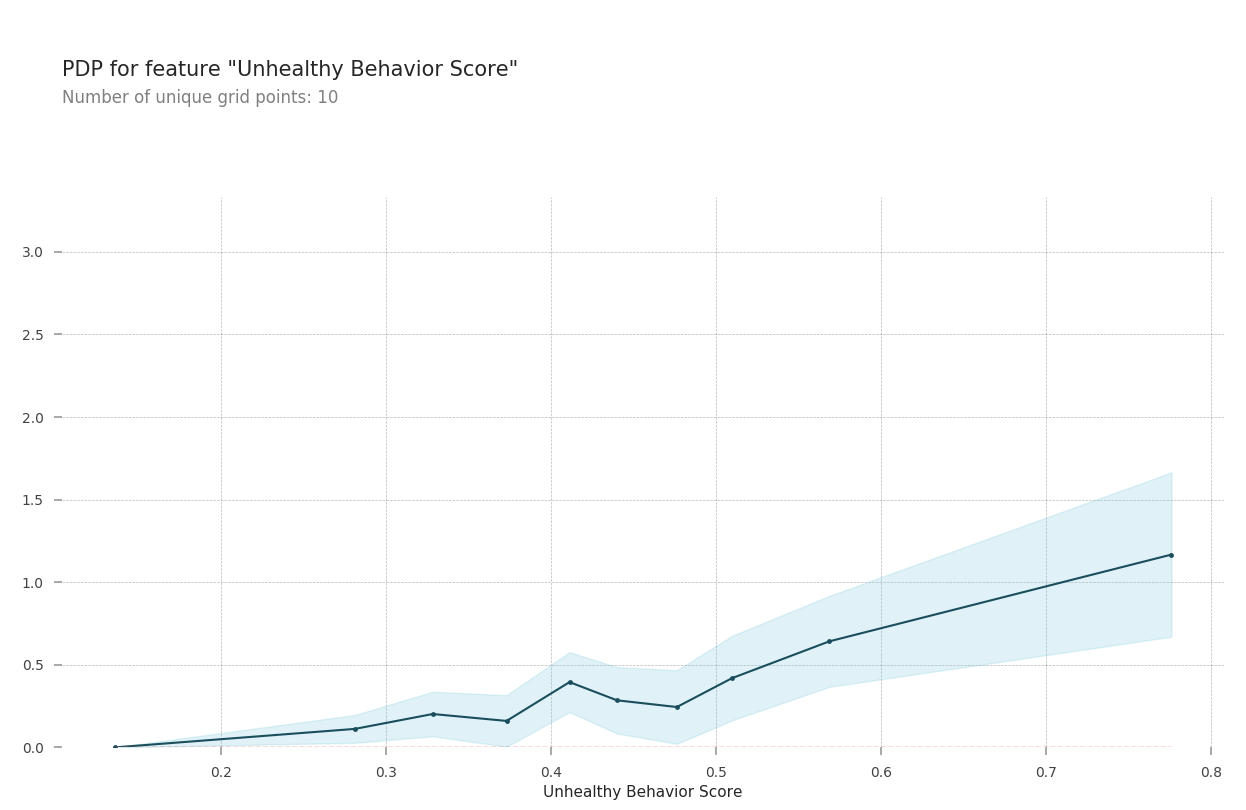

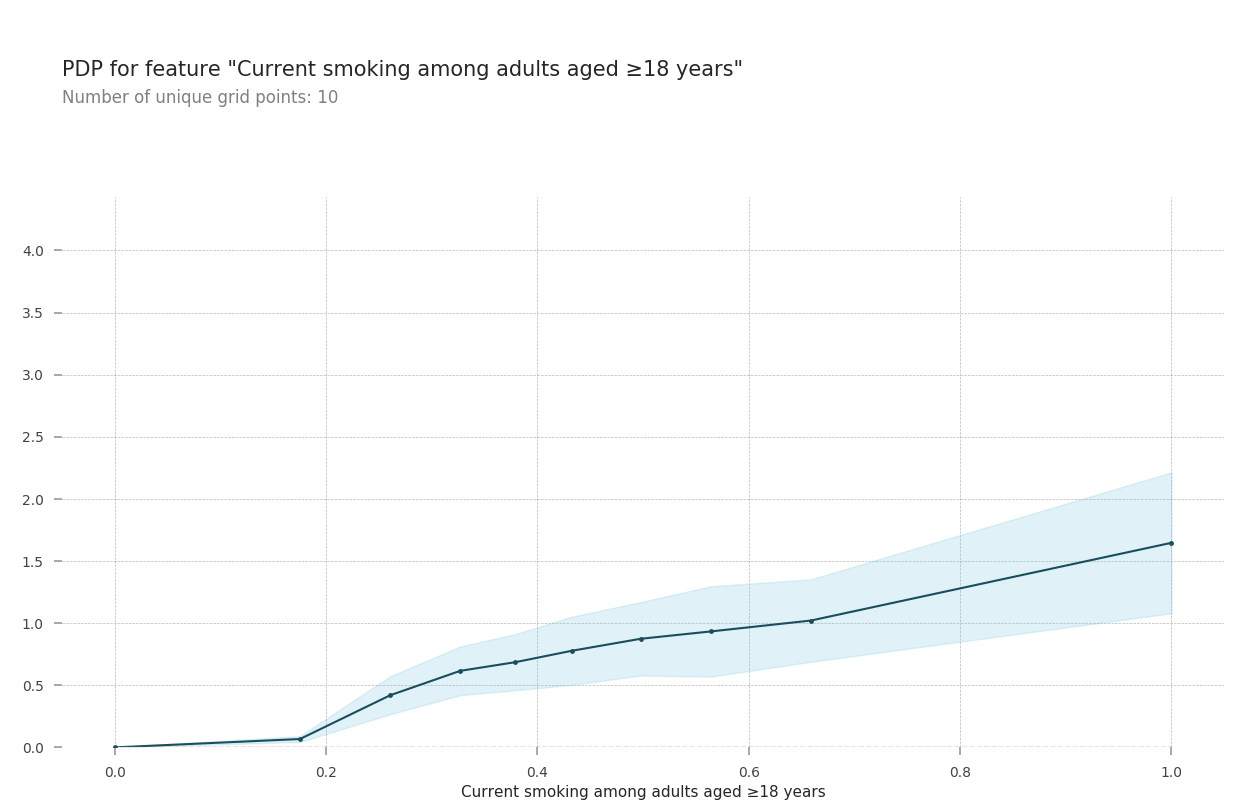

In [0]:
from pdpbox import pdp, get_dataset, info_plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# specify and fit the actual model
model = GradientBoostingRegressor(n_estimators=700, max_features=16)
model.fit(X_train, Y_train)

# feature_importances can be different for every model
# The order is the order of the features in your feature vectors
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(6,4))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

#Partial Dependence Plots
# plt_params ={ 'line_cmap': 'Greens','pdp_color': '#1a5d4b','pdp_hl_color': '1a5d4b','fill_color': '#66d7b4'}
# LPA_CrudePrev
pdp_lpa = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='LPA_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_lpa, 'No leisure-time physical activity among adults aged ≥18 years') #, plot_params=plt_params)
# DENTAL_CrudePrev
pdp_Dental = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='DENTAL_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_Dental, 'Visits to dentist or dental clinic among adults aged ≥18 years') #, plot_params=plt_params)
# Unhealthy Behavior Score
pdp_UHS = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='Unhealthy_Behavior_Score')
fig, axes = pdp.pdp_plot(pdp_UHS, 'Unhealthy Behavior Score')#, plot_params=plt_params)
# CSMOKING_CrudePrev
pdp_CS = pdp.pdp_isolate(
    model=model, dataset=scaled_features_vph, model_features=column_names, feature='CSMOKING_CrudePrev')
fig, axes = pdp.pdp_plot(pdp_CS, 'Current smoking among adults aged ≥18 years') #, plot_params=plt_params)

Model 3 : Linear Model

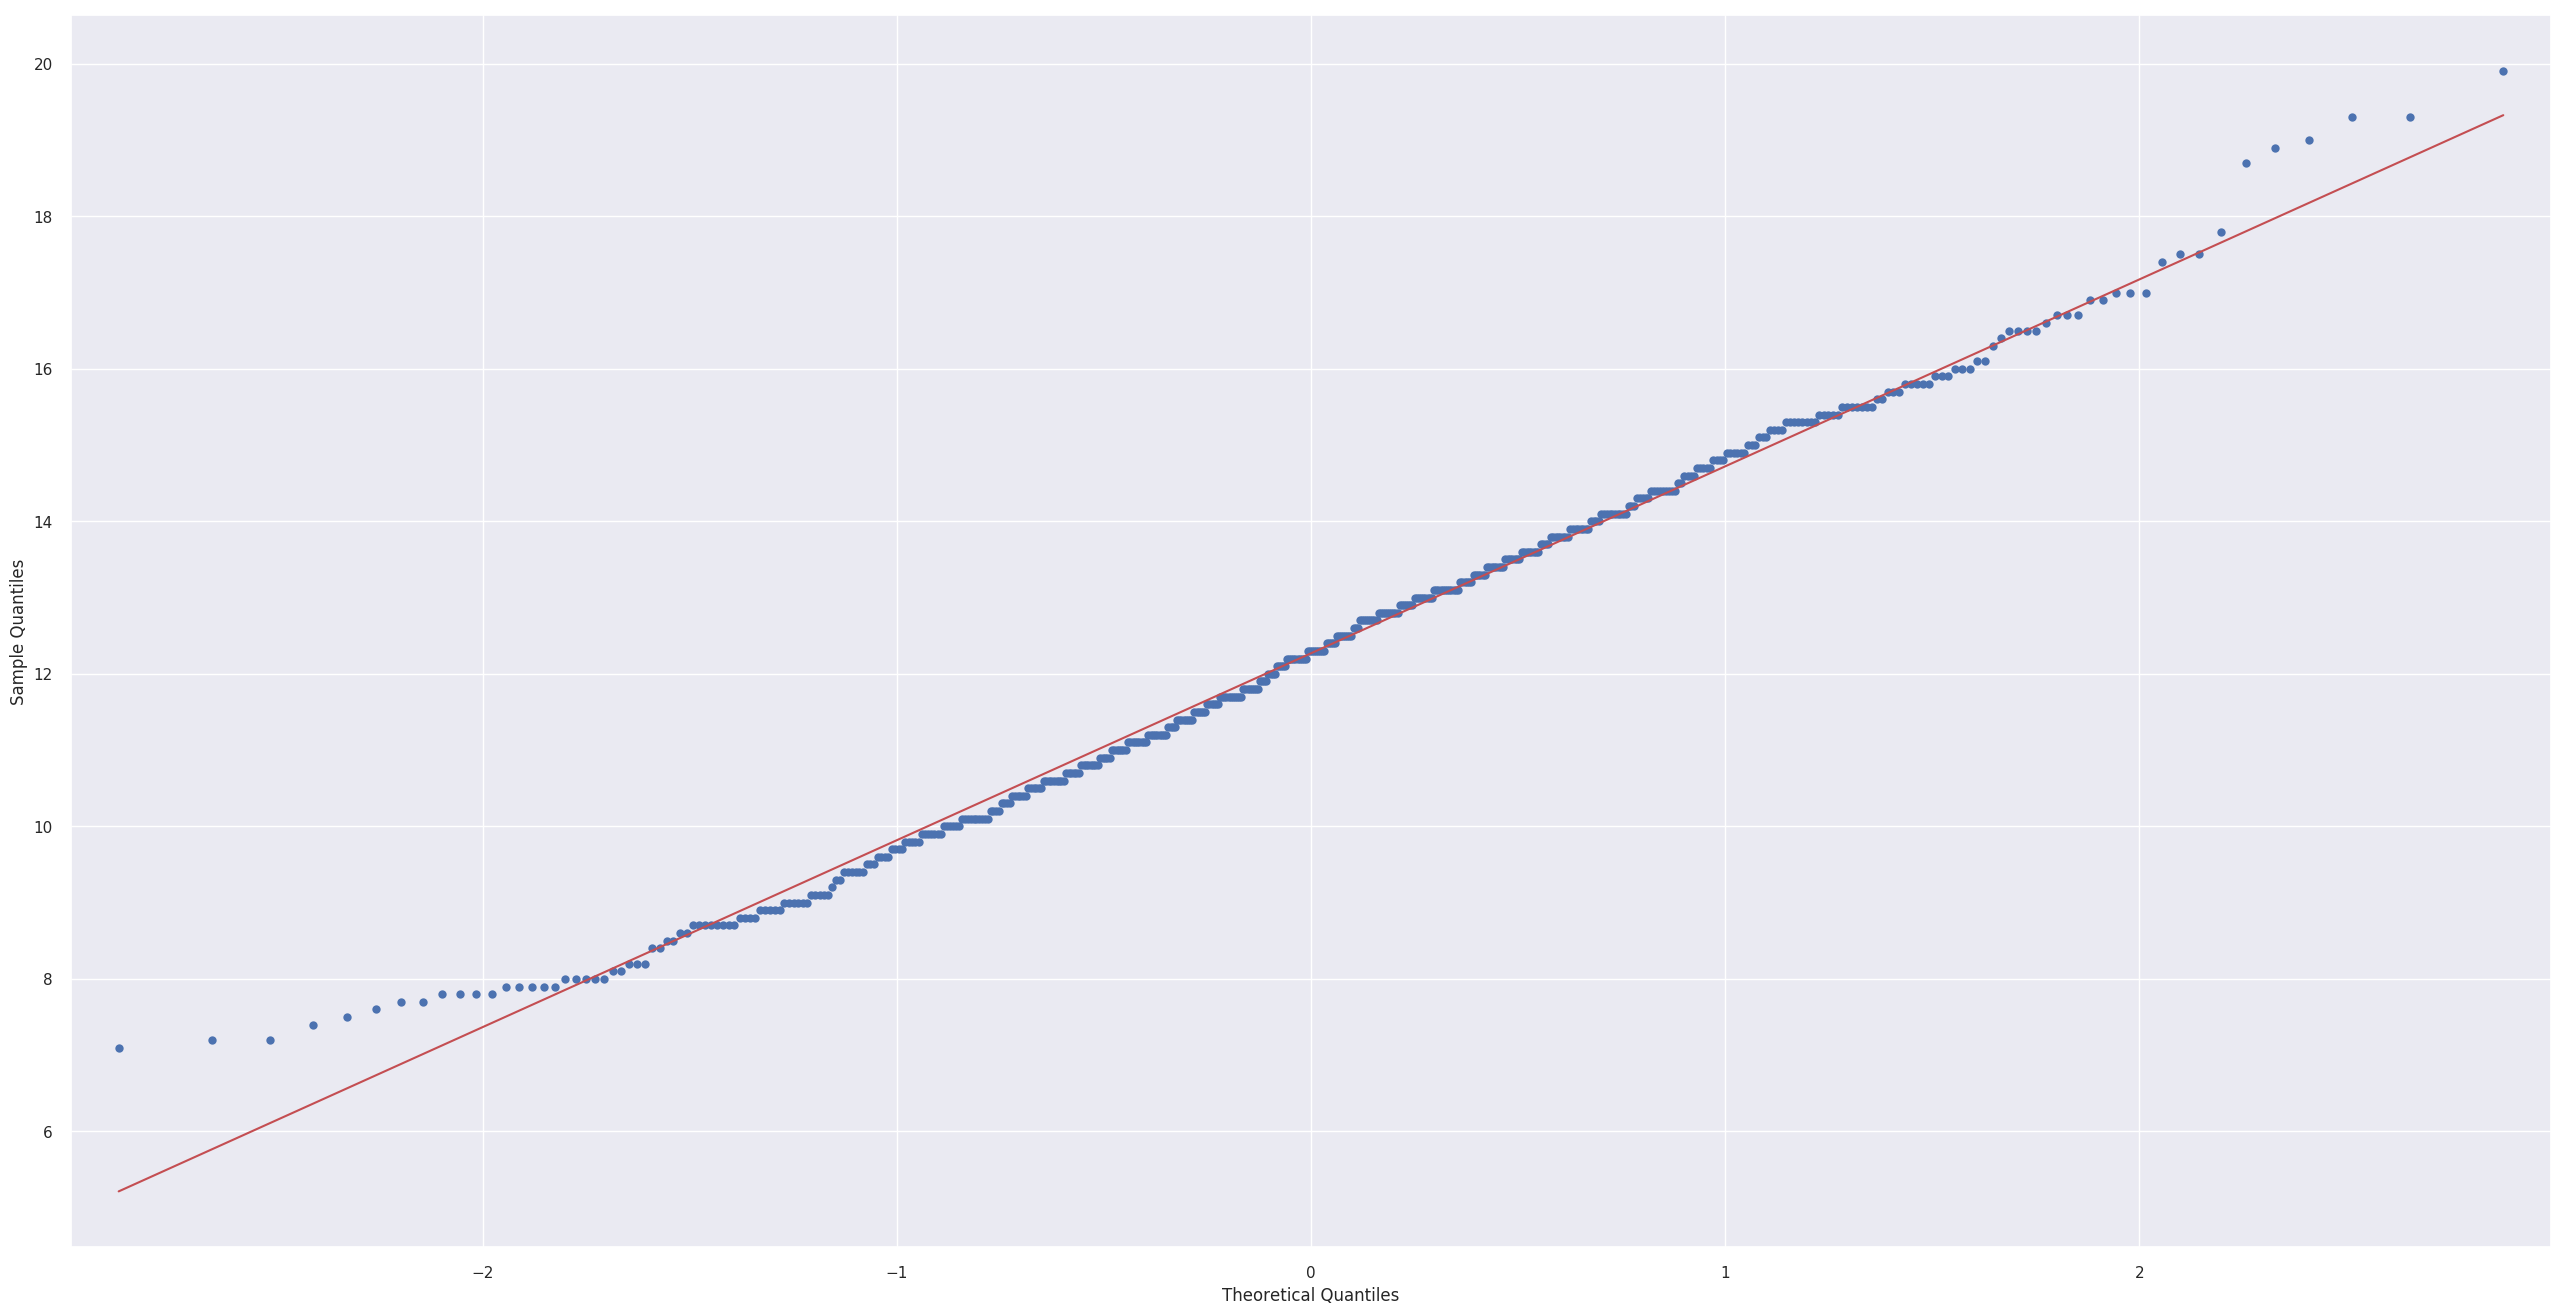

In [0]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(scaled_features_vph['PHLTH_CrudePrev'], line='s')
pyplot.show()

In [0]:
# https://plot.ly/python/normality-test/
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# Test for normality
from scipy import stats

# normality test
stat, p = stats.shapiro(scaled_features_vph['PHLTH_CrudePrev'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.1
if p > alpha:
	print('Sample looks Normal (fail to reject H0)')
else:
	print('Sample does not look Normal (reject H0)')
  


Statistics=0.991, p=0.004
Sample does not look Normal (reject H0)


In [0]:
import statsmodels.api as sm
from sklearn import linear_model

colmn_names=['ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev','MAMMOUSE_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','CORE_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev','Young_Prevention_Score','Unhealthy_Behavior_Score']

colmn_names=['ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','CORE_CrudePrev','BINGE_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev','Young_Prevention_Score','Unhealthy_Behavior_Score']

colmn_names=['ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','BPMED_CrudePrev','CHOLSCREEN_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev','Young_Prevention_Score','Unhealthy_Behavior_Score']

colmn_names=['ACCESS2_CrudePrev','CHECKUP_CrudePrev','DENTAL_CrudePrev','CHOLSCREEN_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','OBESITY_CrudePrev','SLEEP_CrudePrev','Young_Prevention_Score','Unhealthy_Behavior_Score']

colmn_names=['ACCESS2_CrudePrev','CHECKUP_CrudePrev',
             'PAPTEST_CrudePrev','COLON_SCREEN_CrudePrev','CSMOKING_CrudePrev',
             'LPA_CrudePrev','SLEEP_CrudePrev','Young_Prevention_Score']

result=sm.GLM(Y_train,X_train[colmn_names],family=sm.families.Poisson()).fit()
print(result.summary())
predicted = result.predict()
y_val_pred= result.predict(X_val[colmn_names])
y_test_pred= result.predict(X_test[colmn_names])

# lm = linear_model.LinearRegression()
# model = lm.fit(X_train, Y_train)
# print("Score:", model.score(X_val, Y_val))
# print("Score:", model.score(X_test, Y_test))


                 Generalized Linear Model Regression Results                  
Dep. Variable:        PHLTH_CrudePrev   No. Observations:                  400
Model:                            GLM   Df Residuals:                      392
Model Family:                 Poisson   Df Model:                            7
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -929.47
Date:                Fri, 12 Jul 2019   Deviance:                       122.73
Time:                        01:40:06   Pearson chi2:                     126.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
ACCESS2_CrudePrev          0

,Type,MAE,sd(AE),MAPE,sd(MAPE),RMSE,BIAS
2,Test,1.708326,1.631882,14.094077,13.352866,2.351203,0.793523
1,Validation,1.387187,1.102980,11.613164,9.248497,1.765368,-0.319669
0,Training,1.565354,1.196319,12.734300,9.189917,1.969247,-0.112262


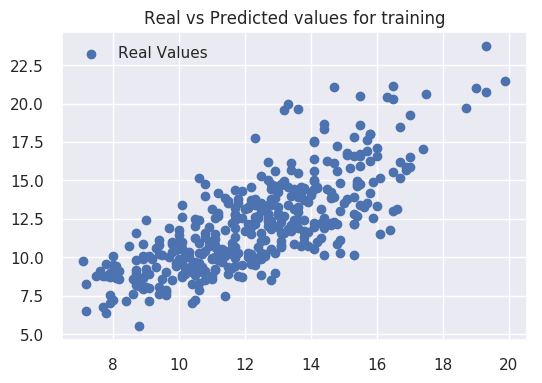

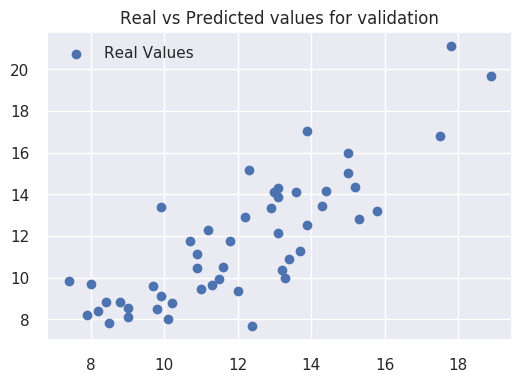

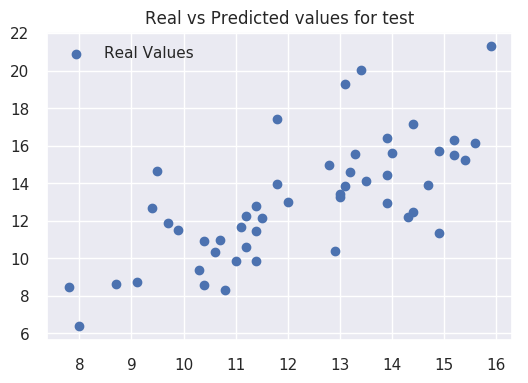

In [0]:
# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_train,predicted)
plt.title('Real vs Predicted values for training')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Training data
MAE = metrics.mean_absolute_error(Y_train,predicted)
MAPE = mean_absolute_percentage_error(Y_train, predicted)
sdAE = sd_absolute_error(Y_train,predicted)
sdMAPE = sd_mape(Y_train,predicted)
BIAS = bias(Y_train,predicted)
RMSE = np.sqrt(metrics.mean_squared_error(Y_train,predicted))


# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_val,y_val_pred)
plt.title('Real vs Predicted values for validation')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on Validation data
VMAE = metrics.mean_absolute_error(Y_val,y_val_pred)
VMAPE = mean_absolute_percentage_error(Y_val, y_val_pred)
VsdAE = sd_absolute_error(Y_val,y_val_pred)
VsdMAPE = sd_mape(Y_val,y_val_pred)
VBIAS = bias(Y_val,y_val_pred)
VRMSE = np.sqrt(metrics.mean_squared_error(Y_val,y_val_pred))

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Y_test,y_test_pred)
plt.title('Real vs Predicted values for test')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

# Error Metrics on test data
TMAE = metrics.mean_absolute_error(Y_test,y_test_pred)
TMAPE = mean_absolute_percentage_error(Y_test, y_test_pred)
TsdAE = sd_absolute_error(Y_test,y_test_pred)
TsdMAPE = sd_mape(Y_test,y_test_pred)
TBIAS = bias(Y_test,y_test_pred)
TRMSE = np.sqrt(metrics.mean_squared_error(Y_test,y_test_pred))


from pandas import DataFrame

Error_metrics = pd.DataFrame(columns=['Type', 'MAE', 'sd(AE)', 'MAPE', 'sd(MAPE)', 'RMSE', 'BIAS'])
new_row = pd.DataFrame({'Type':'Training', 'MAE': MAE ,'sd(AE)': sdAE, 'MAPE': MAPE, 'sd(MAPE)':sdMAPE, 'RMSE': RMSE, 'BIAS': BIAS }, index =[0]) 
# Append values to Dataframe
Error_metrics = Error_metrics.append([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Validation', 'MAE': VMAE ,'sd(AE)': VsdAE, 'MAPE': VMAPE, 'sd(MAPE)':VsdMAPE, 'RMSE': VRMSE, 'BIAS': VBIAS  }, index =[1]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])
new_row = pd.DataFrame({'Type':'Test', 'MAE': TMAE ,'sd(AE)': TsdAE, 'MAPE': TMAPE, 'sd(MAPE)':TsdMAPE,  'RMSE': TRMSE, 'BIAS': TBIAS  }, index =[2]) 
# simply concatenate both dataframes 
Error_metrics = pd.concat([new_row, Error_metrics])
Error_metrics

## Analysis

We used RandomForest for Model 1 and Gradient Boosting Machine for Model 2.  For easy interpretation, lets call Model 1 as Model RF and Model 2 as Model GBM. Lets start with Model interpretation and analyze the results.

Comparing the Error metrics of Model RF and Model GBM, we can see that the RMSE of both the models is around 2 which implies a 2% Crude Prevalance error in predicted variables. Bias is positive for Model RF and Negative for Model GBM. Looking at the bias we can say that the model RF's predicted values are lesser than the actual whereas Model GBM's predicted are greater than the actual values. Overall both the models did great. Looking at the test metrics, Model GBM did a little better compared to Model RF.

Error Metrics of RF:

![Error Metrics RF](https://drive.google.com/uc?id=16OXdPkGoIybSITdBdrNOBKXFWwd-kcV0)


Error Metrics of GBM:

![Error Metrics GBM](https://drive.google.com/uc?id=16OWOh6jcp_mnguQ1e9sKmn6kHFvsTuH9)

Now looking at the variable importance, we can see that both the models have identified the same top 4 contributors. 

            1.No leisure-time physical activity among adults aged ≥18 years
            2.Visits to dentist or dental clinic among adults aged ≥18 years
            3.Unhealthy Behavior Score
            4.Current smoking among adults aged ≥18 years


Feature Importance of RF:

![Feature Importance RF](https://drive.google.com/uc?id=16VqSpSnB7lamAY_P5Fha0O_9K2UbLEkj)

Feature Importance of GBM:

![Feature Importance GBM](https://drive.google.com/uc?id=16WGaH75Pc4GnqRBoGK5xmRLe1KAJUvDq)





In [0]:
state_values = scaled_features_vph.groupby('StateAbbr').agg({'Population2010':'max'}).reset_index()
res_values = state_values.merge(scaled_features_vph, how='inner', left_on=['StateAbbr', 'Population2010'], right_on=['StateAbbr', 'Population2010'])
print(res_values.shape)

res_values['phyhlth_by_state']= grid_resultRF.predict(res_values[column_names])
# grid_resultRF
# grid_resultGBM
res_values
# print(state_values[['PHLTH_CrudePrev','phyhlth_by_state']][state_values['PHLTH_CrudePrev']>13].shape)
# print(state_values[['PHLTH_CrudePrev','phyhlth_by_state']][state_values['PHLTH_CrudePrev']<=13].shape)

(51, 22)


,StateAbbr,Population2010,PlaceName,PlaceFIPS,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,CORE_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Young_Prevention_Score,Unhealthy_Behavior_Score,Geolocation,phyhlth_by_state
0,AK,291826,Anchorage,203000,10.6,0.209596,0.185065,0.579747,0.299639,0.595361,0.215470,0.389610,0.581395,0.581297,0.562842,0.445498,0.201635,0.371345,0.277344,0.373882,0.371733,"(61.14986873100, -149.111113424)",12.19450
1,AL,212237,Birmingham,107000,16.3,0.378788,0.834416,0.260759,0.935018,0.750000,0.895028,0.779221,0.636628,0.356320,0.224044,0.649289,0.694823,0.783626,0.675781,0.631796,0.605513,"(33.52756637730, -86.7988174678)",13.48375
2,AR,193524,Little Rock,541000,13.9,0.194444,0.724026,0.597468,0.812274,0.757732,0.607735,0.649351,0.819767,0.592299,0.344262,0.535545,0.512262,0.564327,0.480469,0.617189,0.487373,"(34.72539578940, -92.3583751863)",12.69625
3,AZ,1445632,Phoenix,455000,13.6,0.371212,0.425325,0.430380,0.498195,0.644330,0.668508,0.649351,0.508721,0.442703,0.404372,0.473934,0.422343,0.444444,0.511719,0.473888,0.451362,"(33.57241386950, -112.088995222)",12.42275
4,CA,3792621,Los Angeles,644000,12.8,0.330808,0.448052,0.417722,0.436823,0.680412,0.668508,0.779221,0.561047,0.412675,0.415301,0.255924,0.329700,0.327485,0.492188,0.462763,0.364120,"(34.11822778980, -118.408500088)",12.22075
5,CO,600158,Denver,820000,10.3,0.267677,0.269481,0.582278,0.407942,0.652062,0.436464,0.792208,0.639535,0.541402,0.808743,0.412322,0.144414,0.143275,0.164062,0.435888,0.334563,"(39.76202837430, -104.876365322)",12.12275
6,CT,144229,Bridgeport,908000,14.1,0.320707,0.597403,0.473418,0.595668,0.675258,0.856354,0.649351,0.622093,0.267147,0.371585,0.473934,0.490463,0.491228,0.625000,0.532491,0.490442,"(41.19280542330, -73.1960546940)",12.69575
7,DC,601723,Washington,1150000,9.0,0.090909,0.889610,0.820253,0.696751,0.811856,0.812155,0.928571,0.732558,0.369975,0.830601,0.412322,0.193460,0.301170,0.476562,0.661876,0.442823,"(38.90992414260, -77.0147205666)",12.15200
8,DE,70851,Wilmington,1077580,14.2,0.325758,0.840909,0.263291,0.776173,0.690722,0.839779,0.694805,0.502907,0.423255,0.327869,0.720379,0.621253,0.628655,0.738281,0.579371,0.607288,"(39.74127482270, -75.5418960925)",13.04250
9,FL,821784,Jacksonville,1235000,13.4,0.406566,0.779221,0.382278,0.747292,0.775773,0.690608,0.675325,0.601744,0.415465,0.535519,0.559242,0.493188,0.479532,0.546875,0.618226,0.522871,"(30.33198201390, -81.6752266207)",12.67500


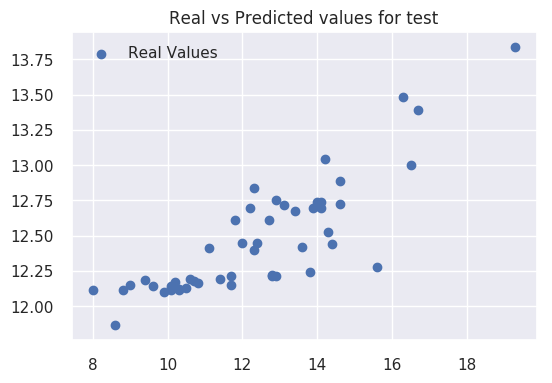

In [0]:
# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(res_values['PHLTH_CrudePrev'],res_values['phyhlth_by_state'])
plt.title('Real vs Predicted values for test')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

  The model is predicting well for mid-range values for cities with maximum population among the states. 

In [0]:
state_values = scaled_features_vph.groupby('StateAbbr').agg({'Population2010':'min'}).reset_index()
min_values = state_values.merge(scaled_features_vph, how='inner', left_on=['StateAbbr', 'Population2010'], right_on=['StateAbbr', 'Population2010'])
print(min_values.shape)

min_values['phyhlth_by_state']= grid_resultRF.predict(min_values[column_names])
# grid_resultRF
# grid_resultGBM
min_values

(51, 22)


,StateAbbr,Population2010,PlaceName,PlaceFIPS,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,CORE_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Young_Prevention_Score,Unhealthy_Behavior_Score,Geolocation,phyhlth_by_state
0,AK,291826,Anchorage,203000,10.6,0.209596,0.185065,0.579747,0.299639,0.595361,0.215470,0.389610,0.581395,0.581297,0.562842,0.445498,0.201635,0.371345,0.277344,0.373882,0.371733,"(61.14986873100, -149.111113424)",12.19450
1,AL,81619,Hoover,135896,9.9,0.154040,0.707792,0.815190,0.805054,0.938144,0.751381,0.811688,0.924419,0.771551,0.475410,0.260664,0.280654,0.418129,0.339844,0.684044,0.354940,"(33.37676027290, -86.8051937568)",12.12200
2,AR,67263,Jonesboro,535710,13.8,0.194444,0.600649,0.400000,0.700361,0.631443,0.430939,0.649351,0.595930,0.499241,0.289617,0.616114,0.523161,0.593567,0.320312,0.505380,0.468554,"(35.82081215380, -90.6794991686)",12.77525
3,AZ,76238,Avondale,404720,12.4,0.381313,0.389610,0.445570,0.379061,0.592784,0.685083,0.649351,0.459302,0.345705,0.469945,0.445498,0.397820,0.438596,0.542969,0.437668,0.458966,"(33.38583674050, -112.323626619)",12.24225
4,CA,66748,Redondo Beach,660018,8.2,0.047980,0.506494,0.878481,0.422383,0.958763,0.729282,0.909091,0.872093,0.691975,0.628415,0.061611,0.054496,0.152047,0.324219,0.562820,0.244158,"(33.85752801590, -118.376567893)",11.79950
5,CO,66859,Loveland,846465,11.0,0.143939,0.321429,0.650633,0.581227,0.796392,0.292818,0.493506,0.718023,0.570727,0.540984,0.336493,0.106267,0.248538,0.097656,0.498724,0.265988,"(40.41656937580, -105.061758435)",12.15300
6,CT,73206,New Britain,950370,13.9,0.270202,0.711039,0.635443,0.606498,0.682990,0.839779,0.649351,0.622093,0.376263,0.404372,0.507109,0.561308,0.453216,0.492188,0.581234,0.483638,"(41.67592265400, -72.7861630705)",12.67725
7,DC,601723,Washington,1150000,9.0,0.090909,0.889610,0.820253,0.696751,0.811856,0.812155,0.928571,0.732558,0.369975,0.830601,0.412322,0.193460,0.301170,0.476562,0.661876,0.442823,"(38.90992414260, -77.0147205666)",12.15200
8,DE,70851,Wilmington,1077580,14.2,0.325758,0.840909,0.263291,0.776173,0.690722,0.839779,0.694805,0.502907,0.423255,0.327869,0.720379,0.621253,0.628655,0.738281,0.579371,0.607288,"(39.74127482270, -75.5418960925)",13.04250
9,FL,66887,Lauderhill,1239550,16.1,0.568182,0.957792,0.197468,0.797834,0.762887,0.939227,0.590909,0.421512,0.208002,0.251366,0.620853,0.692098,0.596491,0.785156,0.656833,0.589193,"(26.16055841870, -80.2241278263)",13.34325


In [0]:
# https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf
# https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv

states = {
'AK':'West',
'AL':'South',
'AR':'South',
'AZ':'West',
'CA':'West',
'CO':'West',
'CT':'Northeast',
'DC':'South',
'DE':'South',
'FL':'South',
'GA':'South',
'HI':'West',
'IA':'Midwest',
'ID':'West',
'IL':'Midwest',
'IN':'Midwest',
'KS':'Midwest',
'KY':'South',
'LA':'South',
'MA':'Northeast',
'MD':'South',
'ME':'Northeast',
'MI':'Midwest',
'MN':'Midwest',
'MO':'Midwest',
'MS':'South',
'MT':'West',
'NC':'South',
'ND':'Midwest',
'NE':'Midwest',
'NH':'Northeast',
'NJ':'Northeast',
'NM':'West',
'NV':'West',
'NY':'Northeast',
'OH':'Midwest',
'OK':'South',
'OR':'West',
'PA':'Northeast',
'RI':'Northeast',
'SC':'South',
'SD':'Midwest',
'TN':'South',
'TX':'South',
'UT':'West',
'VA':'South',
'VT':'Northeast',
'WA':'West',
'WI':'Midwest',
'WV':'South',
'WY':'West'
}

print(len(states.values()))

scaled_features_vph['Region'] = scaled_features_vph['StateAbbr'].map(states)
scaled_features_vph

51


,StateAbbr,PlaceName,PlaceFIPS,Population2010,PHLTH_CrudePrev,ACCESS2_CrudePrev,CHECKUP_CrudePrev,DENTAL_CrudePrev,BPMED_CrudePrev,CHOLSCREEN_CrudePrev,MAMMOUSE_CrudePrev,PAPTEST_CrudePrev,COLON_SCREEN_CrudePrev,CORE_CrudePrev,BINGE_CrudePrev,CSMOKING_CrudePrev,LPA_CrudePrev,OBESITY_CrudePrev,SLEEP_CrudePrev,Young_Prevention_Score,Unhealthy_Behavior_Score,Geolocation,Region
0,LA,Lafayette,2240735,120623,12.9,0.260101,0.623377,0.410127,0.851986,0.677835,0.679558,0.642857,0.616279,0.364145,0.508197,0.620853,0.452316,0.517544,0.507812,0.564685,0.521344,"(30.21205828150, -92.0317532321)",South
1,TX,Denton,4819972,113383,10.1,0.391414,0.483766,0.475949,0.498195,0.479381,0.392265,0.532468,0.627907,0.501812,0.568306,0.436019,0.329700,0.473684,0.265625,0.465741,0.414667,"(33.21561604430, -97.1412438684)",South
2,GA,Macon,1349000,91351,17.5,0.522727,0.915584,0.187342,0.862816,0.695876,0.817680,0.707792,0.456395,0.293963,0.147541,0.810427,0.787466,0.824561,0.757812,0.636869,0.665561,"(32.83204176920, -83.6495823768)",South
3,MI,Warren,2684000,134056,16.0,0.212121,0.681818,0.536709,0.790614,0.786082,0.535912,0.642857,0.566860,0.342304,0.519126,0.810427,0.471390,0.558480,0.582031,0.601469,0.588291,"(42.49342330340, -83.0270075248)",Midwest
4,IN,Hammond,1831000,80830,15.8,0.396465,0.451299,0.215190,0.754513,0.574742,0.359116,0.551948,0.316860,0.217691,0.393443,0.682464,0.637602,0.707602,0.664062,0.478442,0.617035,"(41.61714428280, -87.4909551115)",Midwest
5,FL,Pembroke Pines,1255775,154750,11.6,0.434343,0.850649,0.615190,0.754513,0.899485,0.845304,0.597403,0.572674,0.356356,0.437158,0.213270,0.444142,0.315789,0.453125,0.710836,0.372697,"(26.01273875340, -80.3384522664)",South
6,OR,Bend,4105800,76639,10.5,0.116162,0.305195,0.660759,0.541516,0.731959,0.403315,0.772727,0.703488,0.376604,0.650273,0.312796,0.108992,0.324561,0.214844,0.471118,0.322293,"(44.05618271840, -121.308690416)",West
7,FL,Miami,1245000,399457,15.5,0.808081,0.782468,0.278481,0.830325,0.693299,0.861878,0.584416,0.151163,0.039085,0.311475,0.379147,0.874659,0.426901,0.414062,0.678531,0.481249,"(25.78229589700, -80.2215647762)",South
8,CO,Thornton,877290,118772,10.5,0.267677,0.237013,0.551899,0.303249,0.680412,0.292818,0.720779,0.604651,0.506985,0.606557,0.530806,0.223433,0.330409,0.285156,0.408050,0.395272,"(39.91939941880, -104.944956758)",West
9,MI,Lansing,2646000,114297,14.9,0.242424,0.646104,0.594937,0.657040,0.639175,0.745856,0.759740,0.619186,0.439664,0.601093,0.701422,0.430518,0.678363,0.613281,0.555936,0.604935,"(42.70907117510, -84.5584470022)",Midwest


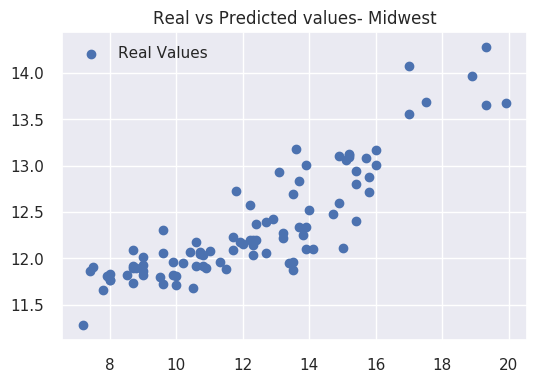

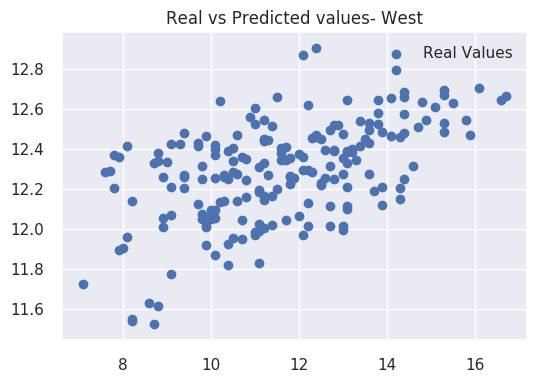

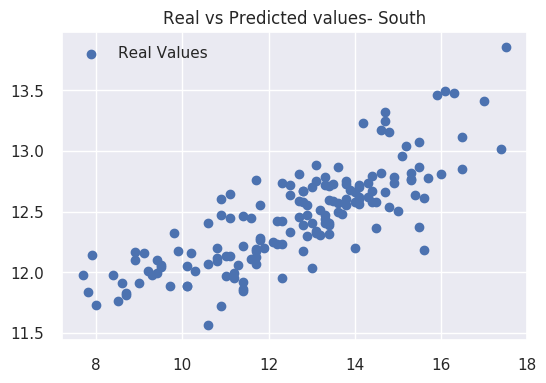

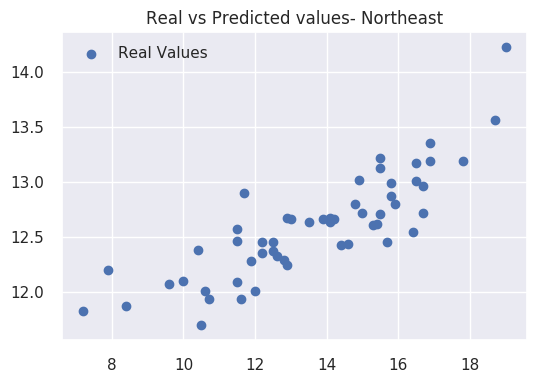

In [0]:
Midwest=scaled_features_vph[scaled_features_vph['Region']=='Midwest']
Midwest['predicted']=grid_resultGBM.predict(Midwest[column_names])
# print(Midwest[['PHLTH_CrudePrev','predicted']])
# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Midwest['PHLTH_CrudePrev'],Midwest['predicted'])
plt.title('Real vs Predicted values- Midwest')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

West=scaled_features_vph[scaled_features_vph['Region']=='West']
West['predicted']=grid_resultGBM.predict(West[column_names])

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(West['PHLTH_CrudePrev'],West['predicted'])
plt.title('Real vs Predicted values- West')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

South=scaled_features_vph[scaled_features_vph['Region']=='South']
South['predicted']=grid_resultGBM.predict(South[column_names])

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(South['PHLTH_CrudePrev'],South['predicted'])
plt.title('Real vs Predicted values- South')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

Northeast=scaled_features_vph[scaled_features_vph['Region']=='Northeast']
Northeast['predicted']=grid_resultGBM.predict(Northeast[column_names])

# Actual Vs Predicted
plt.figure(figsize=(6,4))
plt.scatter(Northeast['PHLTH_CrudePrev'],Northeast['predicted'])
plt.title('Real vs Predicted values- Northeast')
plt.legend(['Real Values', 'Predicted Values'])
plt.show()

In [0]:
Target=(scaled_features_vph[['PHLTH_CrudePrev','StateAbbr']]).groupby('StateAbbr' , as_index = False).max()

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd

import plotly
plotly.tools.set_credentials_file(username='VineelaD', api_key='5wHemEGx5ZgOkdzqOzV5')

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data2 = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = Target['StateAbbr'], 
    z = Target['PHLTH_CrudePrev'].astype(float),
    locationmode = 'USA-states',
#     text = UHS['text'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Crude Prevelance")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Physical Health not good for more than 14 days'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig2 = go.Figure(data = data2, layout = layout)
py.iplot(fig2, filename = 'd3-cloropleth-map')

##GridSearch

In [0]:
# import numpy as np

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)
# {'bootstrap': [True, False],
#  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#  'max_features': ['auto', 'sqrt'],
#  'min_samples_leaf': [1, 2, 4],
#  'min_samples_split': [2, 5, 10],
#  'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [0]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestRegressor

# train_features=X_train
# train_labels=Y_train
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# rf = RandomForestRegressor()
# # Random search of parameters,
# # search across 100 different combinations, and use all available scores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,cv=3, n_iter = 100, verbose=2, random_state=123, n_jobs = -1)
# # print(rf_random)
# # Fit the random search model
# rf_random.fit(train_features, train_labels)

In [0]:
# Make predictions on validation dataset
# from sklearn.metrics import mean_squared_error


# def evaluate(whichset, model, test_features, test_labels):
#     predictions = model.predict(test_features)
#     errors = abs(predictions - test_labels)
#     mape = 100 * np.mean(errors / test_labels)
#     accuracy = 100 - mape
#     print(whichset ,'Model Performance')
#     print('Average Error: {:0.4f} '.format(np.mean(errors)))
#     print('Accuracy = {:0.2f}%.'.format(accuracy))
    
#     return accuracy

# # Fitting the Model
# rf_random.fit(X_train, Y_train)

# # Model Performance on Validation
# accuracy = evaluate('Validation',rf_random, X_val, Y_val)
# # Model Performance on Test
# print('\n')
# accuracy = evaluate('Test',rf_random, X_test, Y_test)